In [2]:
from Extract_ephys_from_struct import ExtractEphysData, calculate_mean_responses, ResponseDistributionPlotter
from Analysis_for_ephys import * # import all functions from Analysis_for_ephys.py"

In [3]:
# Initialize the class with the path to your .mat file
EED = ExtractEphysData('/Users/cresp1el/Documents/MATLAB/lmc_20ms_data.mat')

# Print the values of the new attributes to check if they have been correctly initialized
print(EED.all_data)       # Should print the dictionary stored in 'all_data' in your .mat file
print(EED.group_names)    # Should print a list of group names
print(EED.recordings)     # Should print a dictionary with group names as keys and lists of recording names as values

{'Lmc_noopsin': {'lmc_noch_1_3096_rec1': {'cid159': {'Amplitude': array(1853.00353357), 'Cell_Type': 'RS', 'ChemStimTime_note': 'addctz\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 'ChemStimTime_s': array(4080.8812), 'ChemStimTime_samples': array(122426436, dtype=uint32), 'FR_time_cutoff_after_stim_ms': array(20.), 'FRs_baseline': None, 'FRs_baseline_vec': None, 'FRs_stim': None, 'FanoFactor_baseline': None, 'FanoFactor_stim': None, 'FirstSpikeLatency': None, 'FirstSpikeLatency_Reliability': None, 'FirstSpikeLatency_pdf_x': None, 'FirstSpikeLatency_pdf_y': None, 'FirstSpikeLatency_perTrial': None, 'Header': ['all fields are in samples except trough to peak which is in ms'], 'ISI_baseline_CV

In [ ]:
# Get the amplitudes for all unit IDs
amplitudes = EED.iterate_unit_ids(ExtractEphysData.get_amplitude)
amplitudes

In [5]:
stimulation_data = EED.get_stimulation_data() #get stimulation data for all recordings in all groups in a dictionary with unit ids as keys 
converted_data = EED.reorganize_stimulation_data(stimulation_data) #reorganize the stimulation data in a dictionary with group names as keys and lists of dictionaries with unit ids as values
EED.create_trial_intensity_dataframe(converted_data) #create a dataframe with the trial intensity for all recordings in all groups and save it as an attribute of the class
EED.trial_intensity_dataframes #print the dataframe
EED.trial_intensity_dataframes['0c46c31c86790ba4e5a40aa6205e0a0b0931294445106f8437eb442c2b4669ac']

x = EED.create_xarray(converted_data) #create an xarray with the trial intensity for all recordings in all groups and save it as an attribute of the class


In [53]:
psth_data = EED.get_psths(['c8f5e0605522dfc696ff79b9782300ad3a90175ad0f6e910274d968d39c082e4', '69d625b1ee3dd0d024ae59d92baeb60d2eee6295663dbc4d80b58e344681825a','9a1b248f29d745b2161ce7b4a356007c485094beb24cd10533e13de7a41469ee'])
psth_data

{'c8f5e0605522dfc696ff79b9782300ad3a90175ad0f6e910274d968d39c082e4': {'Pre': {'PSTH_raw': array([[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]])},
  'Post': {'PSTH_raw': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
           0.        ],
          [0.        , 0.        , 9.09090909, ..., 0.        , 0.        ,
           0.        ],
          [7.63358779, 0.        , 0.        , ..., 0.        , 0.        ,
           0.        ],
          [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
           0.        ]])}},
 '69d625b1ee3dd0d024ae59d92baeb60d2eee6295663dbc4d80b58e344681825a': {'Pre': {'PSTH_raw': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
           0.        ],
          [0.        , 0.        , 0.        , ..., 8.19672131, 0.        ,
           0.        ],
          [0.        , 0.        , 

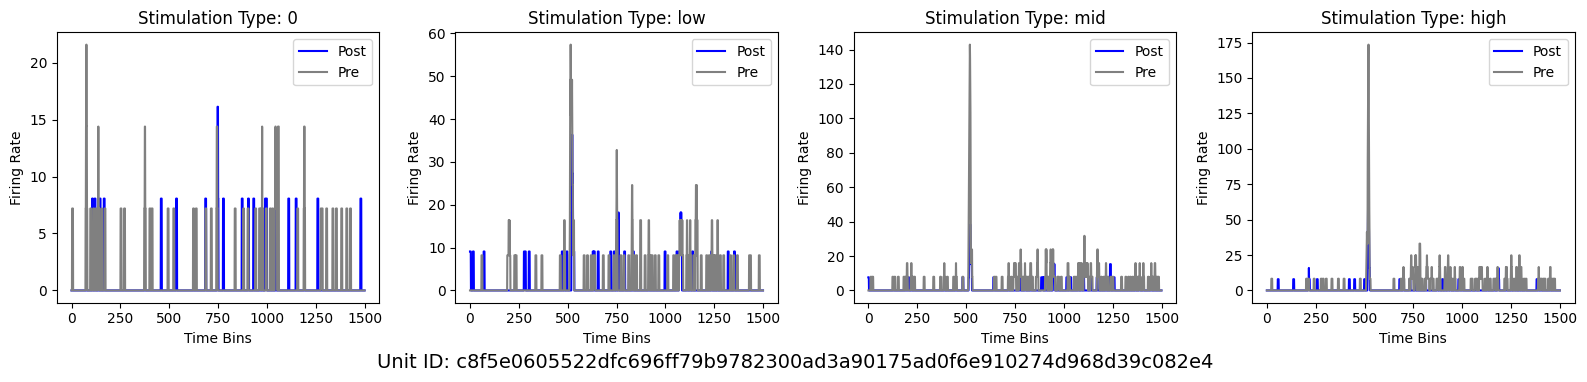

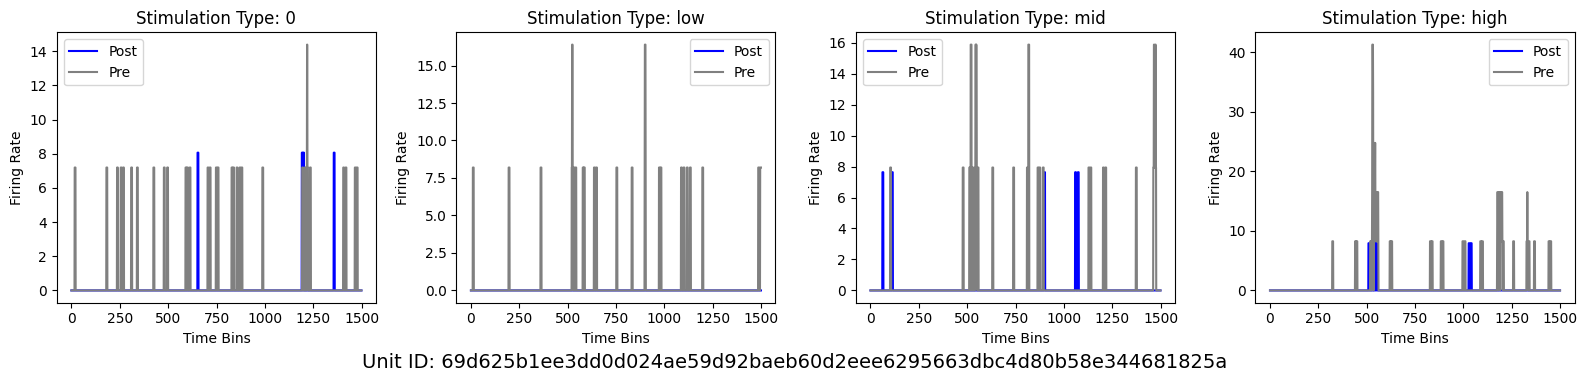

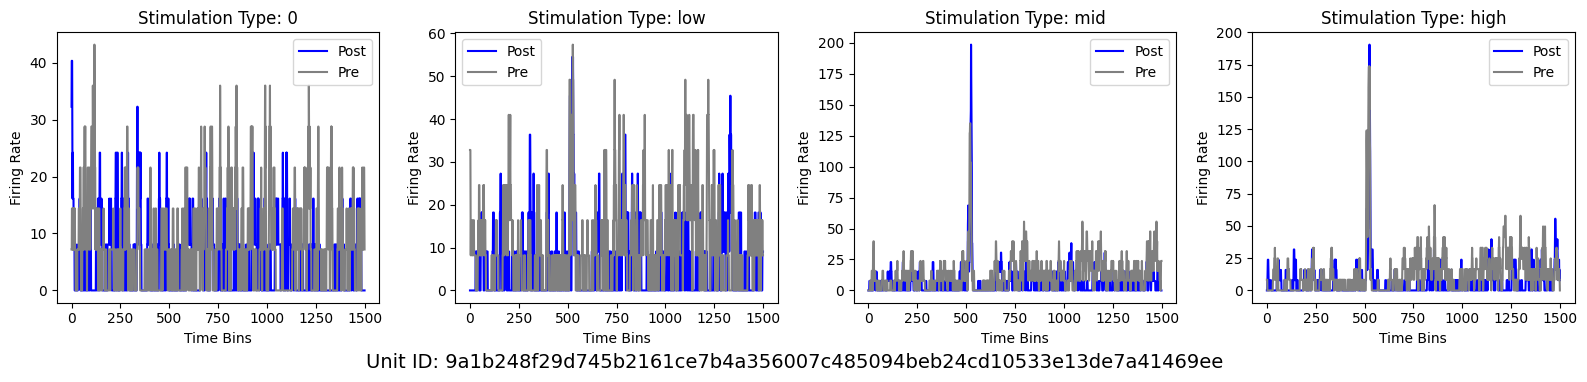

In [55]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

def plot_psth(psth_data, window=5):
    # Define the stimulation types
    stim_types = ['0', 'low', 'mid', 'high']
    
    # Create the convolution window based on the specified size
    convolution_window = np.ones(window)
    
    # Iterate through unit IDs in PSTH data
    for unit_id, unit_data in psth_data.items():
        # Check if there's any data for this unit
        if not unit_data['Pre']['PSTH_raw'].any() or not unit_data['Post']['PSTH_raw'].any():
            continue  # Skip if no data
        
        # Create a new figure for each unit
        fig, axes = plt.subplots(1, 4, figsize=(16, 4))
        
        for i, stim_type in enumerate(stim_types):
            pre_psth = unit_data['Pre']['PSTH_raw'][i]
            post_psth = unit_data['Post']['PSTH_raw'][i]
            
            # Convolve 'Pre' PSTH with the window
            pre_psth_convolved = np.convolve(pre_psth, convolution_window, 'same')
            
            # Convolve 'Post' PSTH with the window
            post_psth_convolved = np.convolve(post_psth, convolution_window, 'same')
            
            # Plot 'Post' PSTH in blue
            axes[i].plot(post_psth_convolved, color='blue', label='Post')
            
            # Plot 'Pre' PSTH in gray on top of 'Post'
            axes[i].plot(pre_psth_convolved, color='gray', label='Pre')
            
            axes[i].set_title(f'Stimulation Type: {stim_type}')
            axes[i].set_xlabel('Time Bins')
            axes[i].set_ylabel('Firing Rate')
        
        # Add legend at a fixed location
        for ax in axes:
            ax.legend()
        
        # Set a title for the entire figure using the unit ID at the bottom
        fig.suptitle(f'Unit ID: {unit_id}', fontsize=14, y=0.02)
        
        # Adjust layout for unit figure
        plt.tight_layout()
        
        # Show the plot for this unit
        plt.show()

# Example usage with your PSTH data
# Replace psth_data with your actual PSTH data
# plot_psth(psth_data)

# Example usage with your PSTH data
# Replace psth_data with your actual PSTH data
# plot_psth(psth_data)

plot_psth(psth_data)




In [ ]:
unit_data = EED.get_unit_data('9fc0d2767bd8cd4ae04ad00b6347491b44e8e9553968a155f383c9ee43aee73a')
stim_intensities_pre = unit_data['Pre']['Stim_Intensity']
stim_intensities_post = unit_data['Post']['Stim_Intensity']
spike_trains = unit_data['Post']['SpikeTrains_trials']

In [ ]:
stim_data = EED.get_stimulation_intensities('9fc0d2767bd8cd4ae04ad00b6347491b44e8e9553968a155f383c9ee43aee73a', custom_func=ExtractEphysData.convert_stim_intensity_dict2_simplerdict)


In [ ]:
for unit_id in EED.unit_id_map: 
    print(unit_id)

In [24]:
# Assuming `xarrays_dict` is your dictionary of xarrays
example_xarray = x['0c46c31c86790ba4e5a40aa6205e0a0b0931294445106f8437eb442c2b4669ac']
print(example_xarray)

# Get the shape of the xarray
xarray_shape = example_xarray.shape
print(f"Shape: {xarray_shape}")

# Get the attributes of the xarray
xarray_attrs = example_xarray.attrs
print(f"Attributes: {xarray_attrs}")



<xarray.DataArray (Trial_ID: 986, Sample: 45000)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)
Coordinates:
  * Trial_ID  (Trial_ID) object 'Trial_1' 'Trial_2' ... 'Trial_985' 'Trial_986'
Dimensions without coordinates: Sample
Attributes:
    Intensity:  [3. 3. 2. 2. 2. 3. 2. 4. 1. 1. 1. 3. 1. 2. 3. 1. 2. 2. 1. 3. ...
Shape: (986, 45000)
Attributes: {'Intensity': array([3., 3., 2., 2., 2., 3., 2., 4., 1., 1., 1., 3., 1., 2., 3., 1., 2.,
       2., 1., 3., 2., 1., 1., 2., 1., 1., 3., 4., 4., 3., 1., 4., 2., 3.,
       4., 4., 3., 4., 3., 3., 2., 2., 1., 1., 3., 1., 3., 2., 4., 3., 4.,
       1., 2., 2., 4., 2., 1., 1., 4., 2., 4., 4., 2., 1., 3., 2., 2., 2.,
       2., 1., 3., 4., 1., 4., 3., 3., 4., 3., 3., 1., 4., 4., 1., 2., 3.,
       2., 4., 1., 3., 3., 1., 4., 1., 2., 2., 2., 3., 1., 3., 3., 3., 1.,
       3., 4

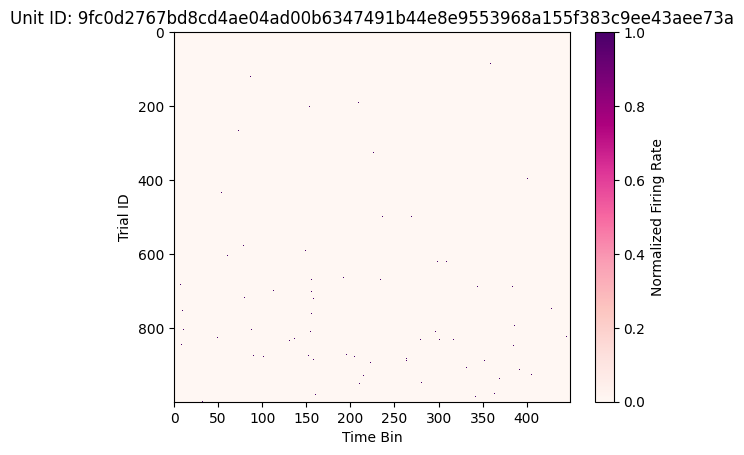

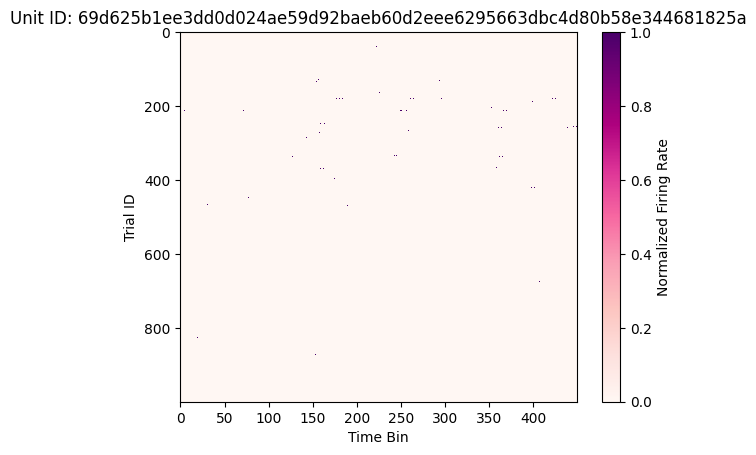

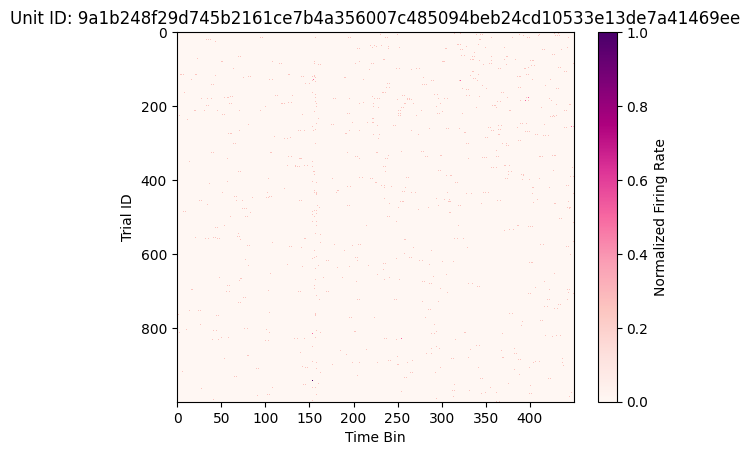

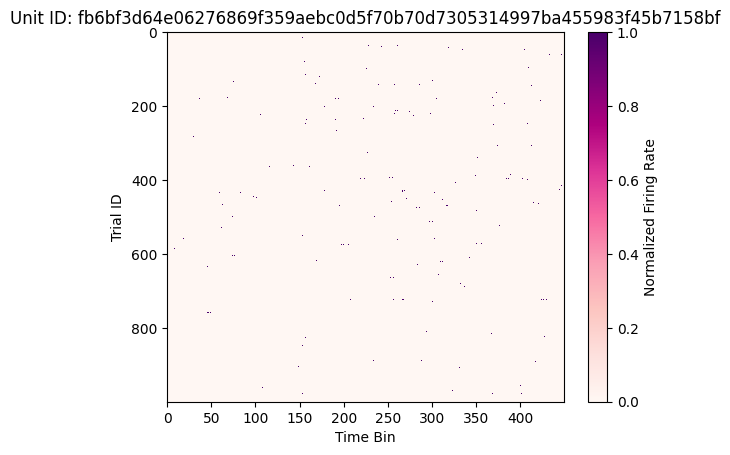

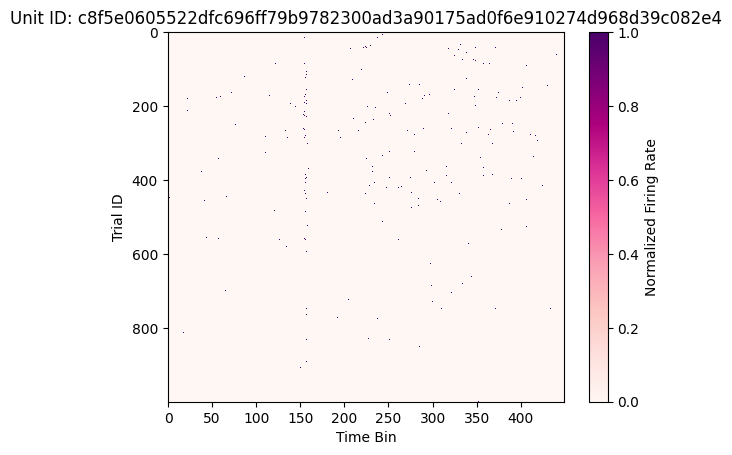

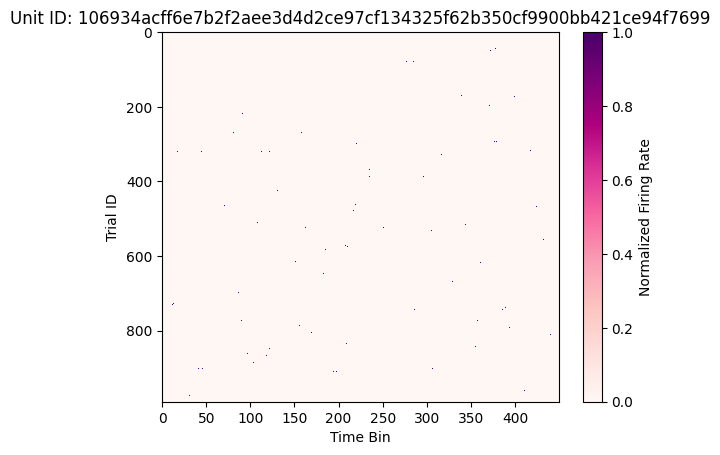

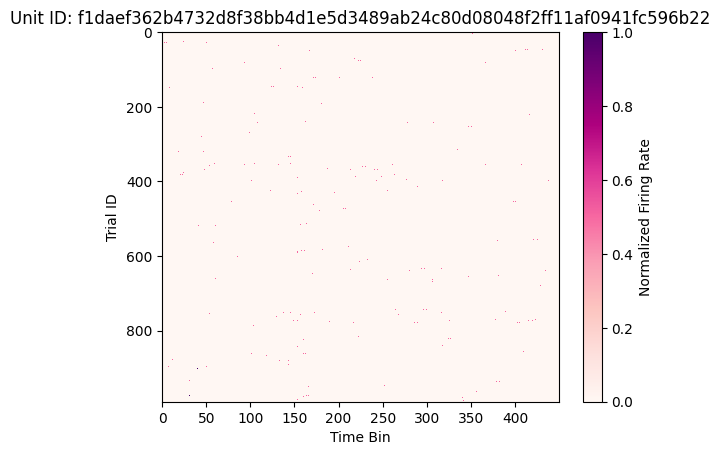

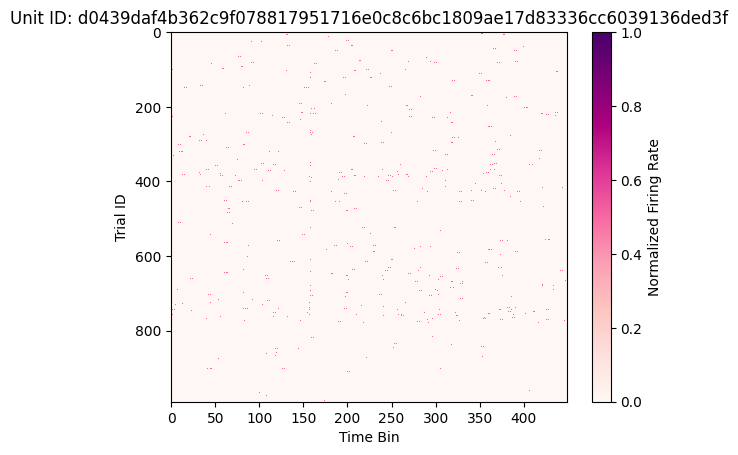

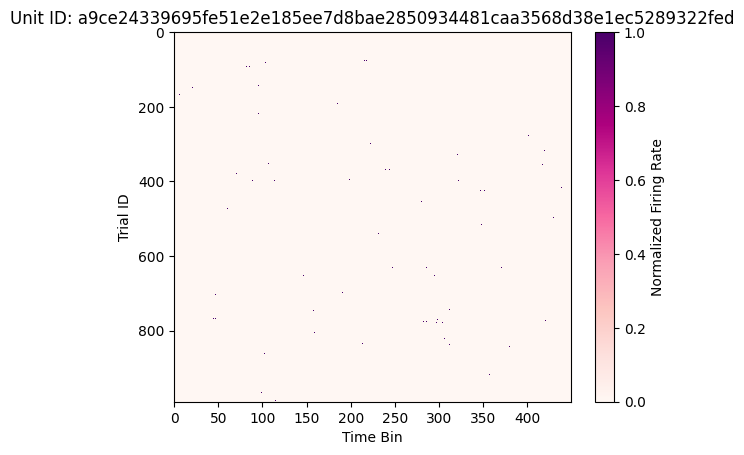

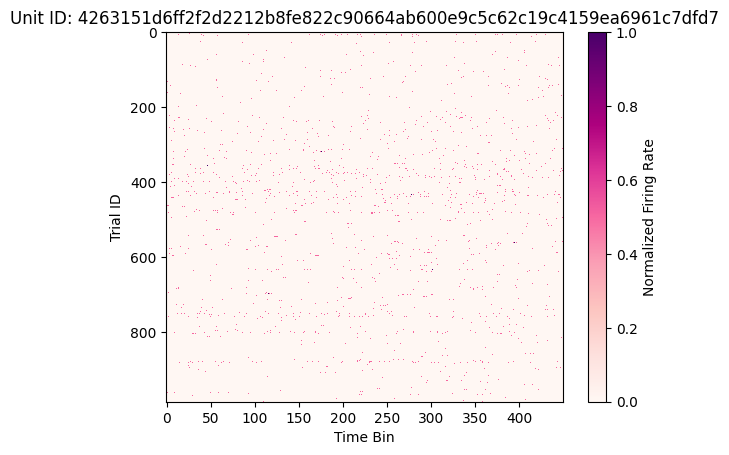

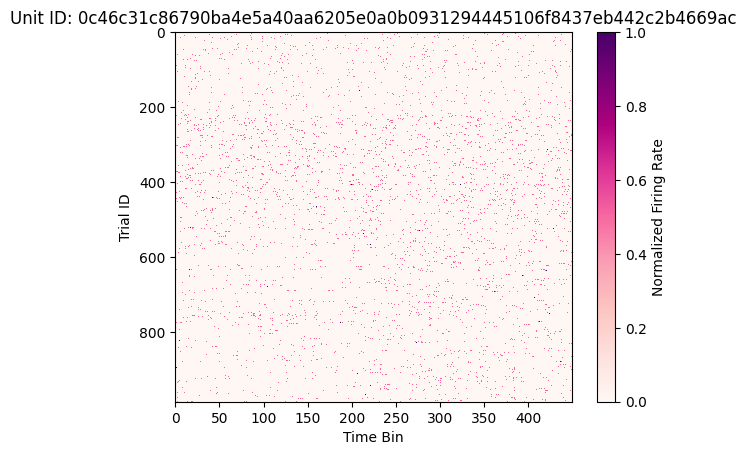

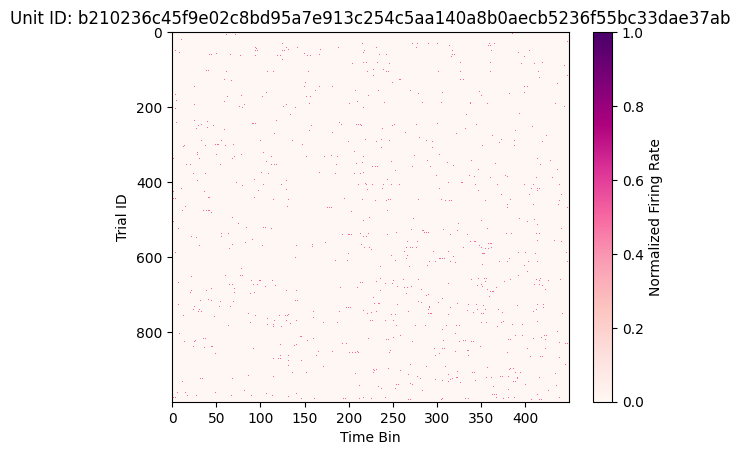

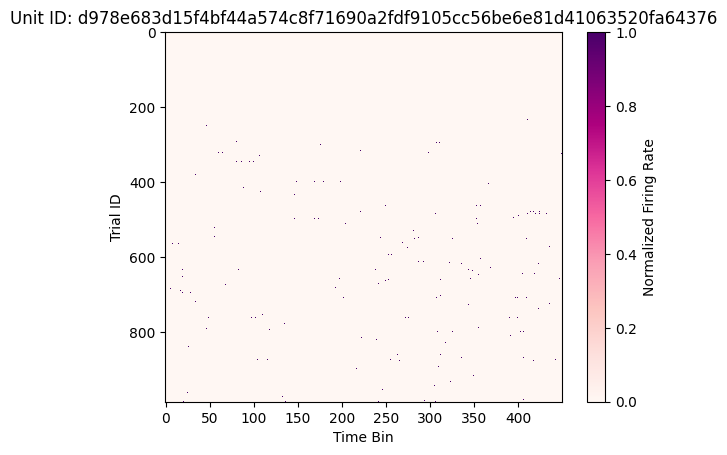

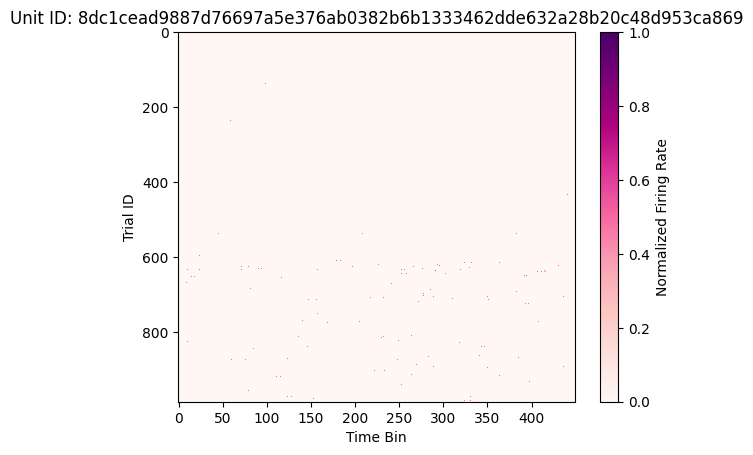

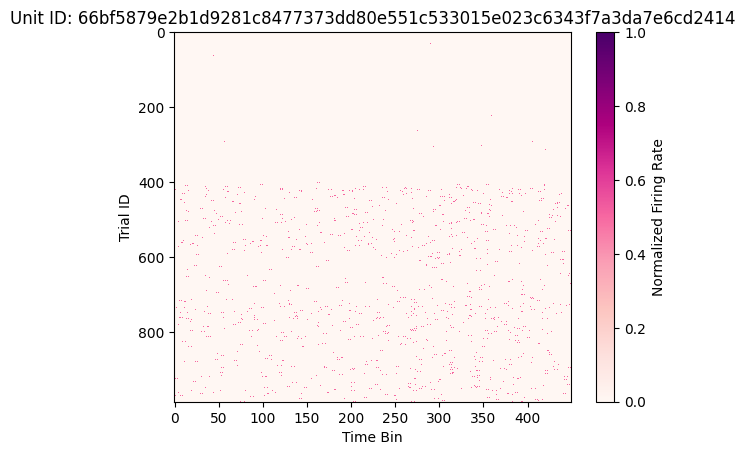

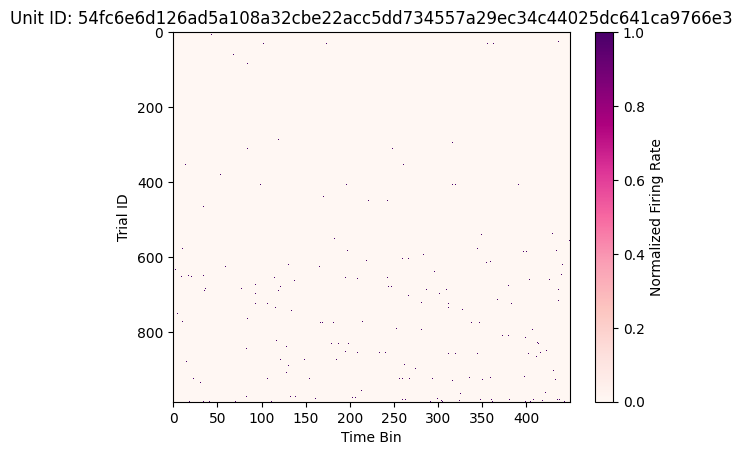

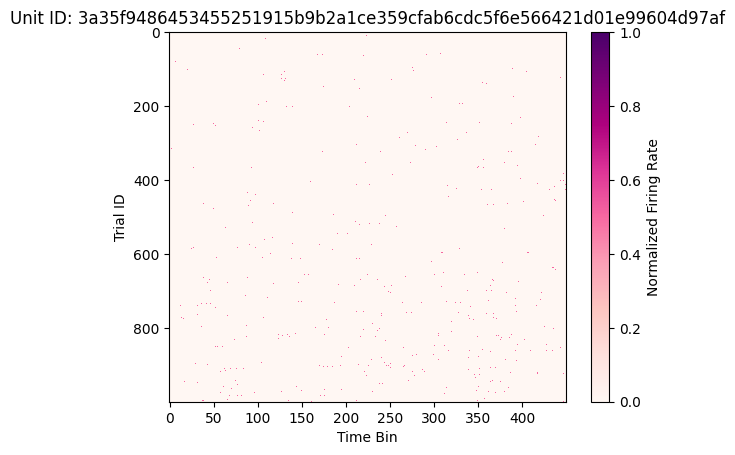

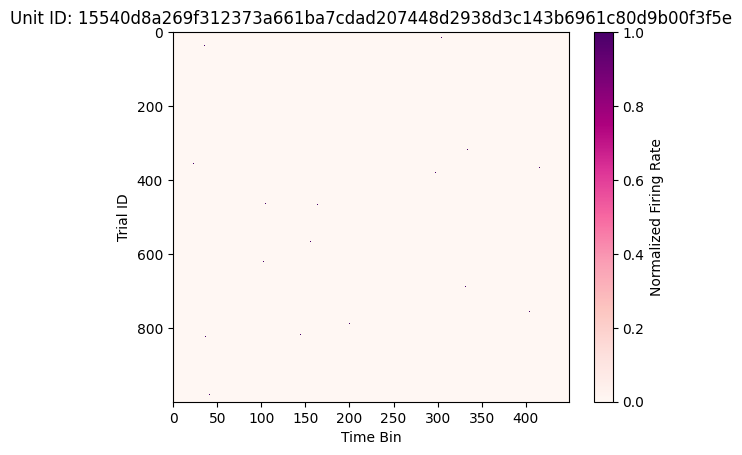

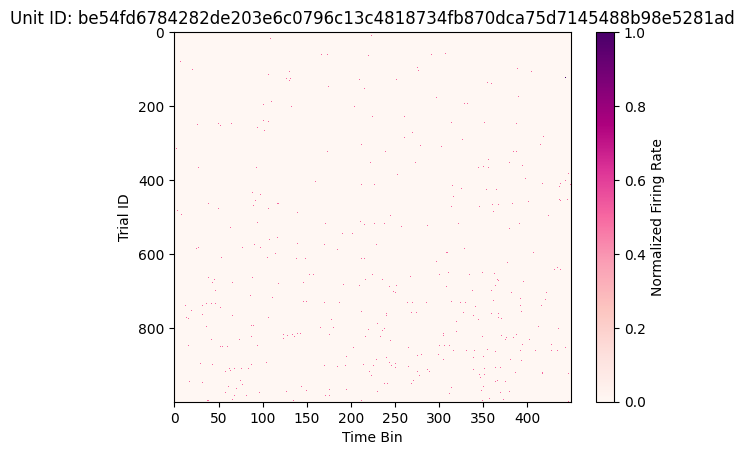

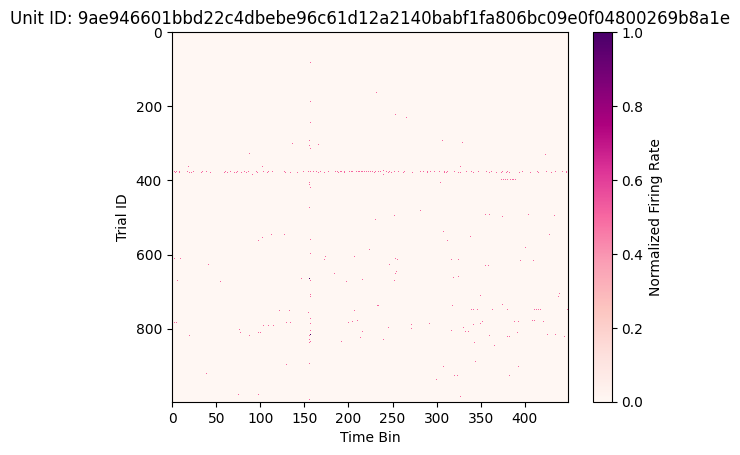

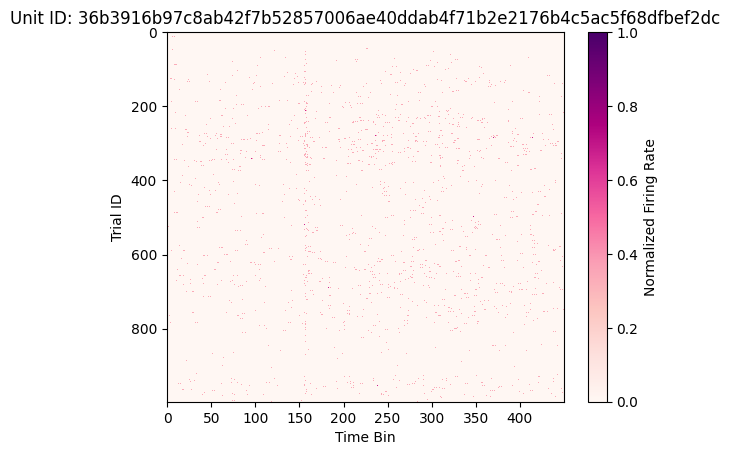

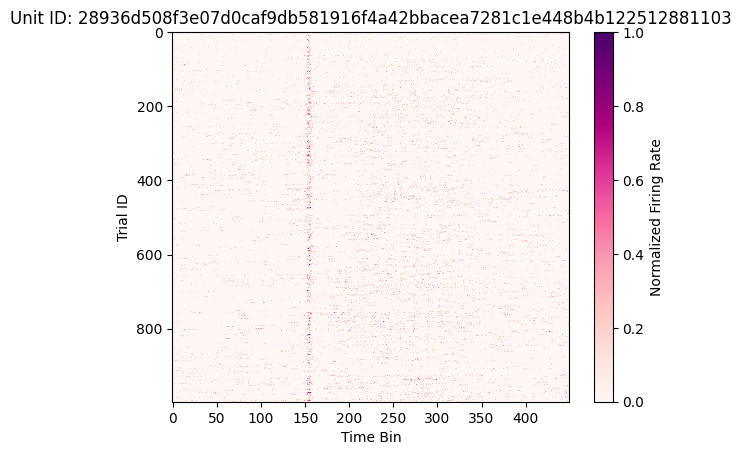

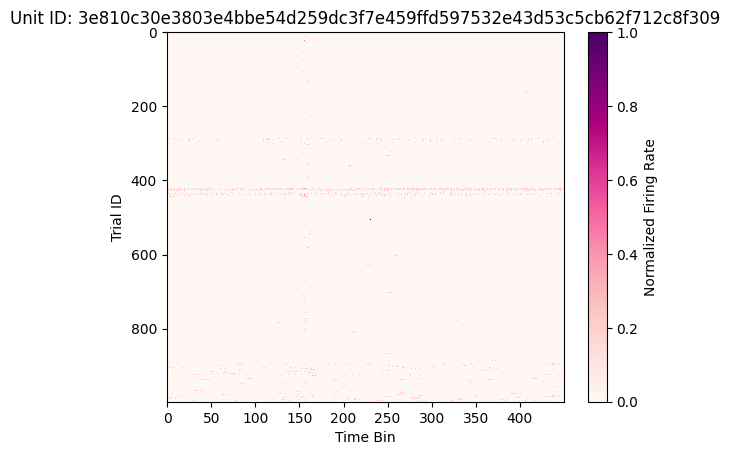

In [25]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

def plot_heatmaps(unit_id_map, xarrays_dict, bin_width):
    for unit_id in unit_id_map:
        # Get the xarray corresponding to the current unit ID
        data_array = xarrays_dict[unit_id]

        # Get the number of trials and the number of samples
        num_trials, num_samples = data_array.shape

        # Calculate the number of bins
        num_bins = num_samples // bin_width

        # Initialize a matrix to store the firing rates
        firing_rate_matrix = np.zeros((num_trials, num_bins))

        # Calculate the firing rates
        for i in range(num_bins):
            # Get the spike counts in the current bin for all trials
            spike_counts = data_array[:, i*bin_width:(i+1)*bin_width].sum(dim='Sample')
            
            # Calculate the firing rate (spike count / bin width in seconds)
            firing_rate_matrix[:, i] = spike_counts / (bin_width / 1000.0)  # Assuming bin_width is in milliseconds

        # Normalize the firing rate matrix by the maximum firing rate
        max_firing_rate = np.max(firing_rate_matrix)
        if max_firing_rate != 0:
            firing_rate_matrix = firing_rate_matrix / max_firing_rate

        # Create a heatmap using imshow
        plt.imshow(firing_rate_matrix, aspect='auto',  cmap='RdPu', interpolation='nearest')

        # Adding color bar and labels
        plt.colorbar(label='Normalized Firing Rate')
        plt.xlabel('Time Bin')
        plt.ylabel('Trial ID')
        
        # Setting title to represent the current unit ID being plotted
        plt.title(f'Unit ID: {unit_id}')

        # Display the plot
        plt.show()


plot_heatmaps(EED.unit_id_map, x, bin_width=100)  # Replace with your actual unit ID map and xarrays dict


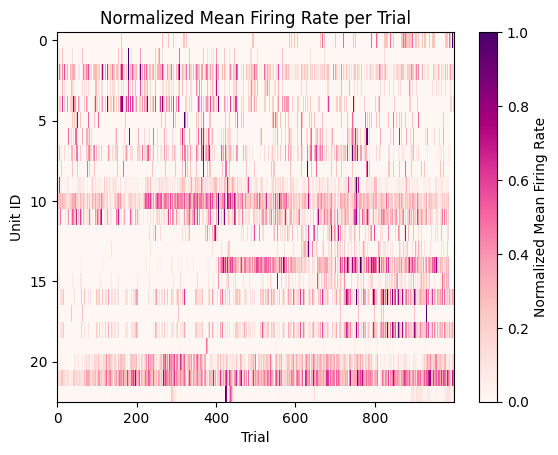

In [26]:
def plot_mean_firing_rate(unit_id_map, xarrays_dict, bin_width):
    # Get the maximum number of trials across all units
    max_trials = max([xarrays_dict[unit_id].shape[0] for unit_id in unit_id_map])

    # List to store the mean firing rate of each unit for each trial
    mean_firing_rates = []

    for unit_id in unit_id_map:
        # Get the xarray corresponding to the current unit ID
        data_array = xarrays_dict[unit_id]

        # Get the number of trials and the number of samples
        num_trials, num_samples = data_array.shape

        # Calculate the number of bins
        num_bins = num_samples // bin_width

        # Initialize a matrix to store the firing rates
        firing_rate_matrix = np.zeros((num_trials, num_bins))

        # Calculate the firing rates
        for i in range(num_bins):
            # Get the spike counts in the current bin for all trials
            spike_counts = data_array[:, i*bin_width:(i+1)*bin_width].sum(dim='Sample')
            
            # Calculate the firing rate (spike count / bin width in seconds)
            firing_rate_matrix[:, i] = spike_counts / (bin_width / 1000.0)  # Assuming bin_width is in milliseconds
        
        # Calculate the mean firing rate for each trial
        mean_firing_rate_per_trial = np.mean(firing_rate_matrix, axis=1)
        
        # Find the maximum mean firing rate for the current unit
        max_mean_firing_rate_per_unit = np.nanmax(mean_firing_rate_per_trial)
        
        # Normalize the mean firing rates by the maximum mean firing rate for the current unit
        mean_firing_rate_per_trial /= max_mean_firing_rate_per_unit
        
        # Create an array with a length equal to max_trials and fill with np.nan
        mean_firing_rate_with_nans = np.full(max_trials, np.nan)
        
        # Assign the mean firing rates to the first num_trials elements
        mean_firing_rate_with_nans[:num_trials] = mean_firing_rate_per_trial
        
        mean_firing_rates.append(mean_firing_rate_with_nans)
    
    # Create a matrix with units as rows and trials as columns
    mean_firing_rate_matrix = np.vstack(mean_firing_rates)

    # Create a heatmap using imshow
    plt.imshow(mean_firing_rate_matrix, aspect='auto', cmap='RdPu', interpolation='nearest')

    # Adding color bar and labels
    plt.colorbar(label='Normalized Mean Firing Rate')
    plt.xlabel('Trial')
    plt.ylabel('Unit ID')
    
    # Setting title
    plt.title('Normalized Mean Firing Rate per Trial')

    # Display the plot
    plt.show()

# Call the function
plot_mean_firing_rate(EED.unit_id_map, x, bin_width=100)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def plot_mean_firing_rate_by_intensity(unit_id_map, xarrays_dict, bin_width, group_name):
    
    # Filter the unit IDs based on the specified group name
    unit_ids_to_include = [unit_id for unit_id, attrs in unit_id_map.items() if attrs['group'] == group_name]
    
    intensities = [1, 2, 3, 4]
    
    # Create a list of lists to store the mean firing rates by intensity
    mean_firing_rates_by_intensity = [[] for _ in range(4)]
    
    for unit_id in unit_ids_to_include:
        data_array = xarrays_dict[unit_id]
        num_trials, num_samples = data_array.shape
        num_bins = num_samples // bin_width
        
        # Calculate the firing rates using a vectorized approach
        reshaped_array = data_array.values.reshape(num_trials, num_bins, bin_width)
        spike_counts = reshaped_array.sum(axis=2)
        firing_rate_matrix = spike_counts / (bin_width / 1000.0)
        
        # Calculate the mean firing rate for each trial
        mean_firing_rate_per_trial = np.mean(firing_rate_matrix, axis=1)

        # Get the intensity values
        intensity_values = data_array.attrs['Intensity']
        
        for intensity in intensities:
            # Find the trials corresponding to the current intensity
            trials = np.where(intensity_values == intensity)[0]
            
            # Get the mean firing rate for the trials corresponding to the current intensity
            mean_firing_rate_for_current_intensity = mean_firing_rate_per_trial[trials]
            
            # Normalize by the max mean firing rate for this unit and this intensity
            max_rate = np.max(mean_firing_rate_for_current_intensity)
            if max_rate != 0:  # Avoid division by zero
                mean_firing_rate_for_current_intensity /= max_rate
            
            mean_firing_rates_by_intensity[intensity-1].append(mean_firing_rate_for_current_intensity.tolist())

    # Plot a 1x4 subplot for each intensity
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    for i, ax in enumerate(axes):
        # Get all the mean firing rates for the current intensity
        data_for_current_intensity = mean_firing_rates_by_intensity[i]
        
        # Get the maximum number of trials for the current intensity
        max_num_trials = max(map(len, data_for_current_intensity))
        
        # Create a 2D array filled with NaNs
        data_matrix = np.full((len(data_for_current_intensity), max_num_trials), np.nan)
        
        # Fill in the data
        for j, data in enumerate(data_for_current_intensity):
            data_matrix[j, :len(data)] = data
        
        # Plot the heatmap
        cax = ax.imshow(data_matrix, aspect='auto', cmap='RdPu', interpolation='nearest')
        ax.set_title(f'Intensity {i+1}')
        ax.set_xlabel('Trial')
        ax.set_ylabel('Unit ID')
    
    # Adding a colorbar to the right of the last plot
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    fig.colorbar(cax, cax=cbar_ax, label='Normalized Mean Firing Rate')
    
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.show()

# Call the function
plot_mean_firing_rate_by_intensity(EED.unit_id_map, x, bin_width=100, group_name= 'Lmc_opsin')

In [27]:
from scipy.stats import pearsonr
import numpy as np
import xarray as xr
import numpy as np

def calculate_reliability(xarrays_dict, unit_id_map, bin_width, group_name):
    reliability_scores = {}
    
    # Filter the unit IDs based on the specified group name
    unit_ids_to_include = [unit_id for unit_id, attrs in unit_id_map.items() if attrs['group'] == group_name]
    
    for unit_id in unit_ids_to_include:
        # Get the data array for the current unit
        data_array = xarrays_dict[unit_id]
        
        # Create a DataArray for the 'Intensity' attribute
        intensity_da = xr.DataArray(data_array.attrs['Intensity'], dims=['Trial_ID'], coords={'Trial_ID': data_array['Trial_ID']})
        
        # Use this DataArray to filter the trials where intensity is not equal to 1
        data_array = data_array.where(intensity_da != 1, drop=True)
        
        # Get the number of trials and the number of samples
        num_trials, num_samples = data_array.shape
        
        if num_trials < 2:
            reliability_scores[unit_id] = np.nan
            continue
        
        # Calculate the number of bins
        num_bins = num_samples // bin_width
        
        # Initialize a matrix to store the firing rates
        firing_rate_matrix = np.zeros((num_trials, num_bins))
        
        # Calculate the firing rates
        for i in range(num_bins):
            # Get the spike counts in the current bin for all trials
            spike_counts = data_array[:, i*bin_width:(i+1)*bin_width].sum(dim='Sample')
            
            # Calculate the firing rate (spike count / bin width in seconds)
            firing_rate_matrix[:, i] = spike_counts / (bin_width / 1000.0)  # Assuming bin_width is in milliseconds
        
        # Calculate the pairwise correlations between all trials
        corr_matrix = np.corrcoef(firing_rate_matrix, rowvar=True)
        
        # Avoid nan values by adding a small value to the diagonal
        corr_matrix[np.isnan(corr_matrix)] = 0
        
        # Calculate the reliability score as the mean of the off-diagonal elements of the correlation matrix
        reliability_score = np.mean(corr_matrix[np.triu_indices(num_trials, k=1)])
        
        # Store the reliability score for the current unit
        reliability_scores[unit_id] = reliability_score
    
    return reliability_scores

     

# Usage
bin_width = 100  # Adjust as necessary
reliability_scores = calculate_reliability(x,EED.unit_id_map, bin_width=100, group_name='Lmc_opsin')


/Users/cresp1el/anaconda3/envs/matlab_python_proj/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/cresp1el/anaconda3/envs/matlab_python_proj/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/cresp1el/anaconda3/envs/matlab_python_proj/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/cresp1el/anaconda3/envs/matlab_python_proj/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/cresp1el/anaconda3/envs/matlab_python_proj/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/cresp1el/anaconda3/envs/matlab_python_proj/lib/python3.11/

In [28]:
reliability_scores

{'4263151d6ff2f2d2212b8fe822c90664ab600e9c5c62c19c4159ea6961c7dfd7': 6.526929707307725e-05,
 '0c46c31c86790ba4e5a40aa6205e0a0b0931294445106f8437eb442c2b4669ac': 0.0005801045700625125,
 'b210236c45f9e02c8bd95a7e913c254c5aa140a8b0aecb5236f55bc33dae37ab': -7.301494065029796e-05,
 'd978e683d15f4bf44a574c8f71690a2fdf9105cc56be6e81d41063520fa64376': 4.741882150487799e-06,
 '8dc1cead9887d76697a5e376ab0382b6b1333462dde632a28b20c48d953ca869': -3.1296467242599817e-06,
 '66bf5879e2b1d9281c8477373dd80e551c533015e023c6343f7a3da7e6cd2414': 0.00011516292424037582,
 '54fc6e6d126ad5a108a32cbe22acc5dd734557a29ec34c44025dc641ca9766e3': -2.2088726461690634e-05,
 '3a35f9486453455251915b9b2a1ce359cfab6cdc5f6e566421d01e99604d97af': 4.5581473705953305e-05,
 '15540d8a269f312373a661ba7cdad207448d2938d3c143b6961c80d9b00f3f5e': 3.763770852306622e-06,
 'be54fd6784282de203e6c0796c13c4818734fb870dca75d7145488b98e5281ad': 3.963088724422362e-06,
 '9ae946601bbd22c4dbebe96c61d12a2140babf1fa806bc09e0f04800269b8a1e': 0.00

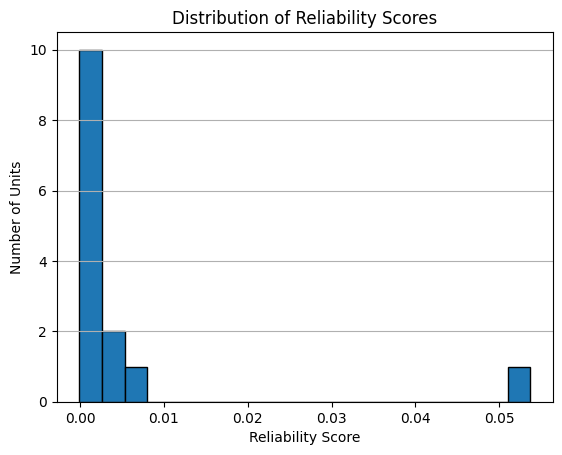

In [29]:
reliability_scores
# Assuming reliability_scores is your dictionary of scores
scores = list(reliability_scores.values())

# Plotting the histogram excluding NaN values
scores = np.array(list(reliability_scores.values()))
scores = scores[~np.isnan(scores)]

plt.hist(scores, bins=20, edgecolor='black')
plt.xlabel('Reliability Score')
plt.ylabel('Number of Units')
plt.title('Distribution of Reliability Scores')
plt.grid(axis='y')
plt.show()

/Users/cresp1el/anaconda3/envs/matlab_python_proj/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/cresp1el/anaconda3/envs/matlab_python_proj/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/cresp1el/anaconda3/envs/matlab_python_proj/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/cresp1el/anaconda3/envs/matlab_python_proj/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/cresp1el/anaconda3/envs/matlab_python_proj/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/cresp1el/anaconda3/envs/matlab_python_proj/lib/python3.11/

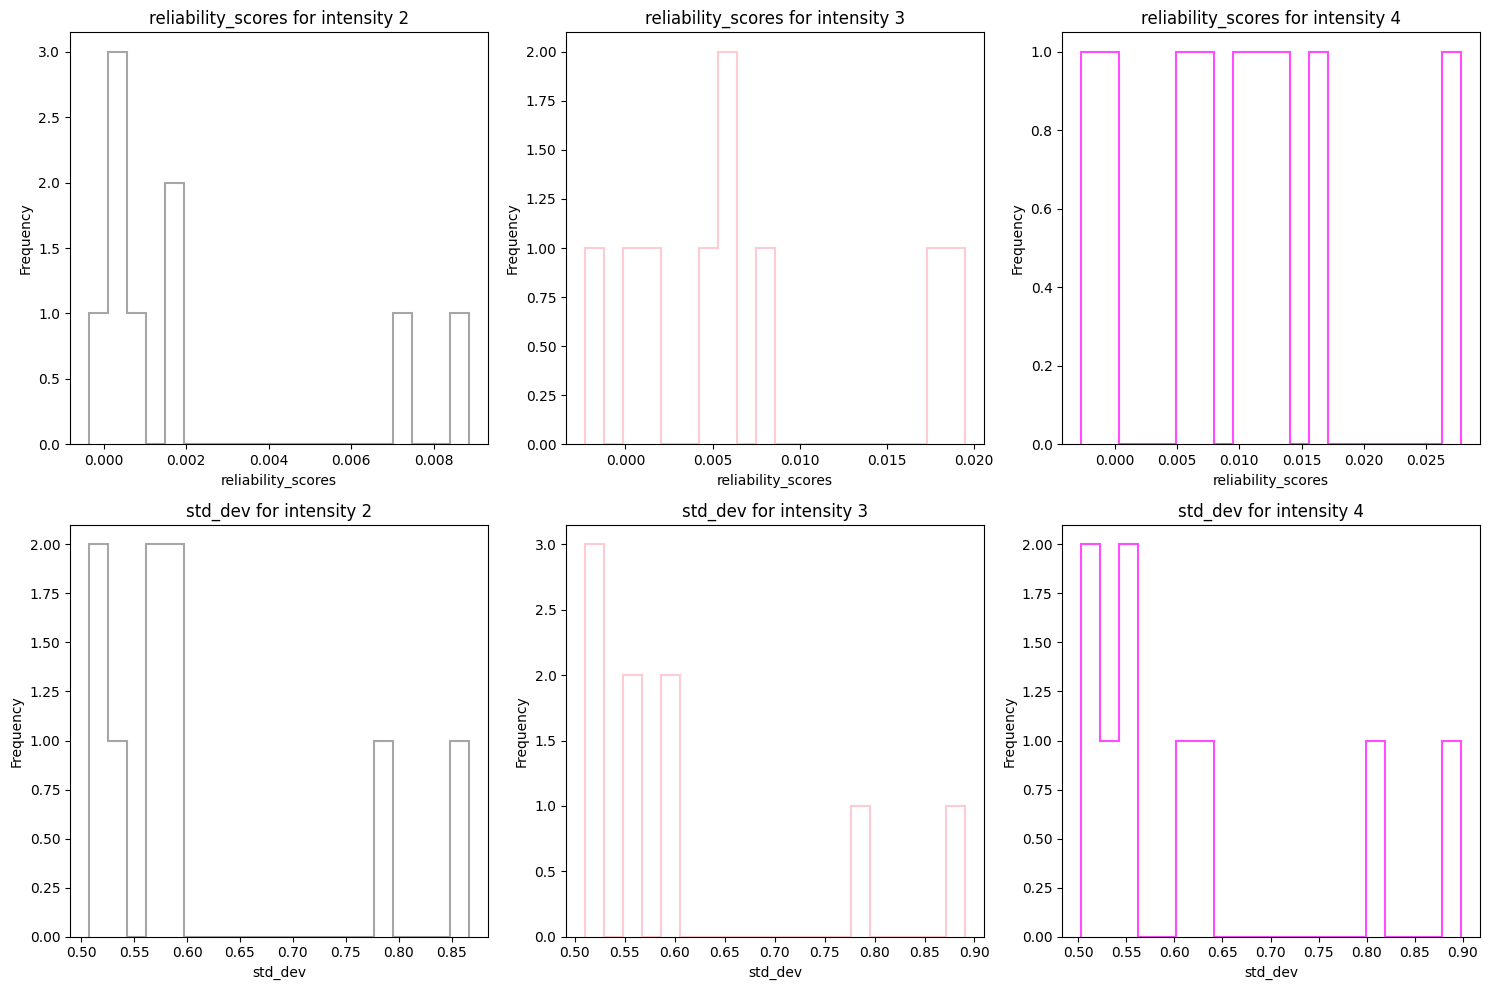

In [30]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

def calculate_reliability_by_stim(xarrays_dict, unit_id_map, bin_width, group_name=None):
    results = {
        'reliability_scores': {2: {}, 3: {}, 4: {}},
        'std_dev': {2: {}, 3: {}, 4: {}}
    }

    # Filter the unit IDs based on the specified group name
    if group_name:
        unit_ids_to_include = [unit_id for unit_id, attrs in unit_id_map.items() if attrs['group'] == group_name]
    else:
        unit_ids_to_include = list(unit_id_map.keys())

    for unit_id in unit_ids_to_include:
        data_array = xarrays_dict[unit_id]
        
        # Create a DataArray for the intensity attribute
        intensity_da = xr.DataArray(data_array.attrs['Intensity'], dims=['Trial_ID'], coords={'Trial_ID': data_array['Trial_ID']})
        
        for intensity in [2, 3, 4]:
            data_array_intensity = data_array.where(intensity_da == intensity, drop=True)
            
            if data_array_intensity.shape[0] < 2:  # Need at least two trials to calculate reliability
                results['reliability_scores'][intensity][unit_id] = np.nan
                results['std_dev'][intensity][unit_id] = np.nan
                continue
            
            num_trials, num_samples = data_array_intensity.shape
            num_bins = num_samples // bin_width
            
            firing_rate_matrix = np.zeros((num_trials, num_bins))
            
            for i in range(num_bins):
                spike_counts = data_array_intensity[:, i*bin_width:(i+1)*bin_width].sum(dim='Sample')
                firing_rate_matrix[:, i] = spike_counts / (bin_width / 1000.0)  # Assuming bin_width is in milliseconds

            std_dev = np.std(firing_rate_matrix, axis=1)
            std_dev[std_dev == 0] = np.nan

            correlation_matrix = np.corrcoef(firing_rate_matrix, rowvar=True)
            results['reliability_scores'][intensity][unit_id] = np.nanmean(correlation_matrix[np.triu_indices(num_trials, k=1)])
            results['std_dev'][intensity][unit_id] = np.nanmean(std_dev)

    # Sort the reliability scores and std_dev in descending order for each intensity
    for intensity in [2, 3, 4]:
        results['reliability_scores'][intensity] = dict(sorted(results['reliability_scores'][intensity].items(), key=lambda x: -x[1]))
        results['std_dev'][intensity] = dict(sorted(results['std_dev'][intensity].items(), key=lambda x: -x[1]))

    return results



# Usage example with a group name
bin_width = 100  # Adjust as necessary
group_name = 'Lmc_noopsin'  # Adjust as necessary
reliability_scores_by_stim = calculate_reliability_by_stim(x, EED.unit_id_map, bin_width=100, group_name=group_name)


# Plotting the histogram excluding NaN values for each intensity
import matplotlib.pyplot as plt

def plot_histograms(results, combined=False):
    if combined:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        colors = ['grey', 'lightpink', 'fuchsia']
        
        for i, metric in enumerate(['reliability_scores', 'std_dev']):
            for j, intensity in enumerate([2, 3, 4]):
                data = list(results[metric][intensity].values())
                valid_data = [x for x in data if not np.isnan(x)]
                
                axes[i].hist(valid_data, bins=20, histtype='step', linewidth=1.5, alpha=0.7, color=colors[j], label=f'Intensity {intensity}')
            
            axes[i].set_title(f'{metric} for all intensities')
            axes[i].set_xlabel(metric)
            axes[i].set_ylabel('Frequency')
            axes[i].legend()
    else:
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        colors = ['grey', 'lightpink', 'fuchsia']
        
        for i, metric in enumerate(['reliability_scores', 'std_dev']):
            for j, intensity in enumerate([2, 3, 4]):
                data = list(results[metric][intensity].values())
                valid_data = [x for x in data if not np.isnan(x)]
                
                axes[i, j].hist(valid_data, bins=20, histtype='step', linewidth=1.5, color=colors[j], alpha=0.7)
                axes[i, j].set_title(f'{metric} for intensity {intensity}')
                axes[i, j].set_xlabel(metric)
                axes[i, j].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()
results = calculate_reliability_by_stim(x, EED.unit_id_map, bin_width=100, group_name='Lmc_noopsin')
plot_histograms(results) #or plot_histograms(results, combined=True) 

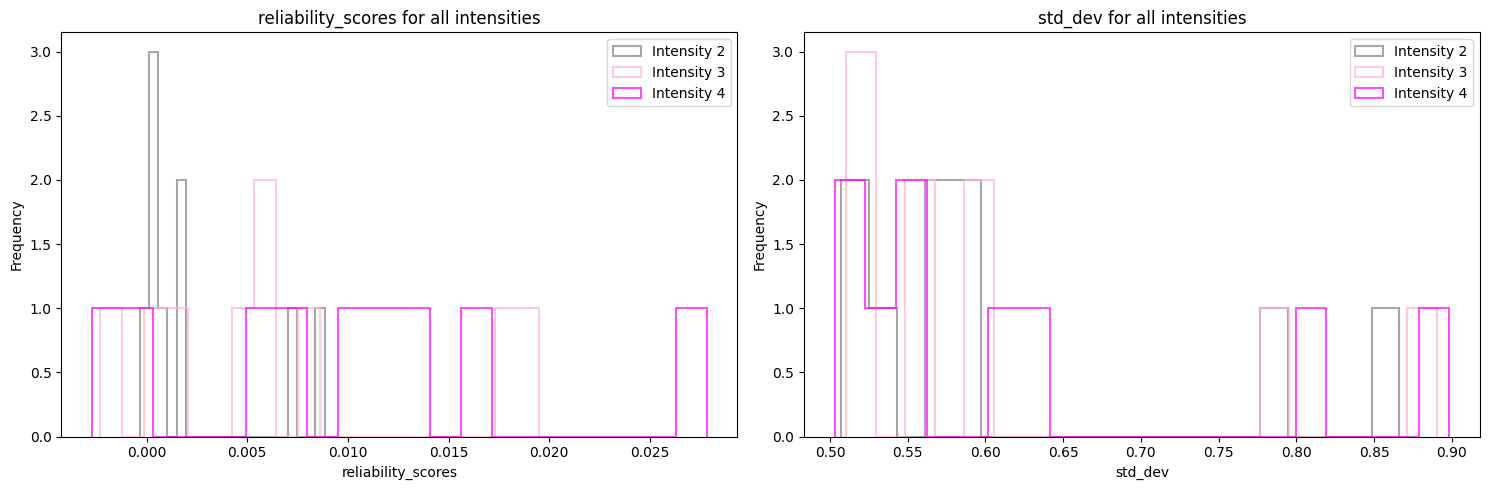

In [31]:
plot_histograms(results, combined=True)

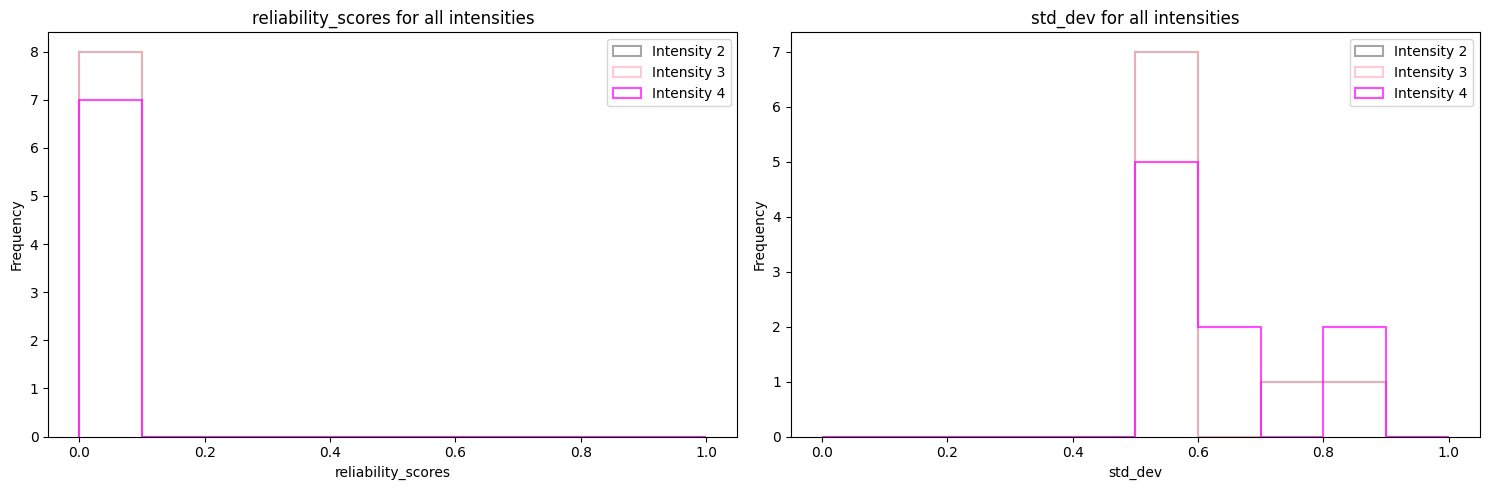

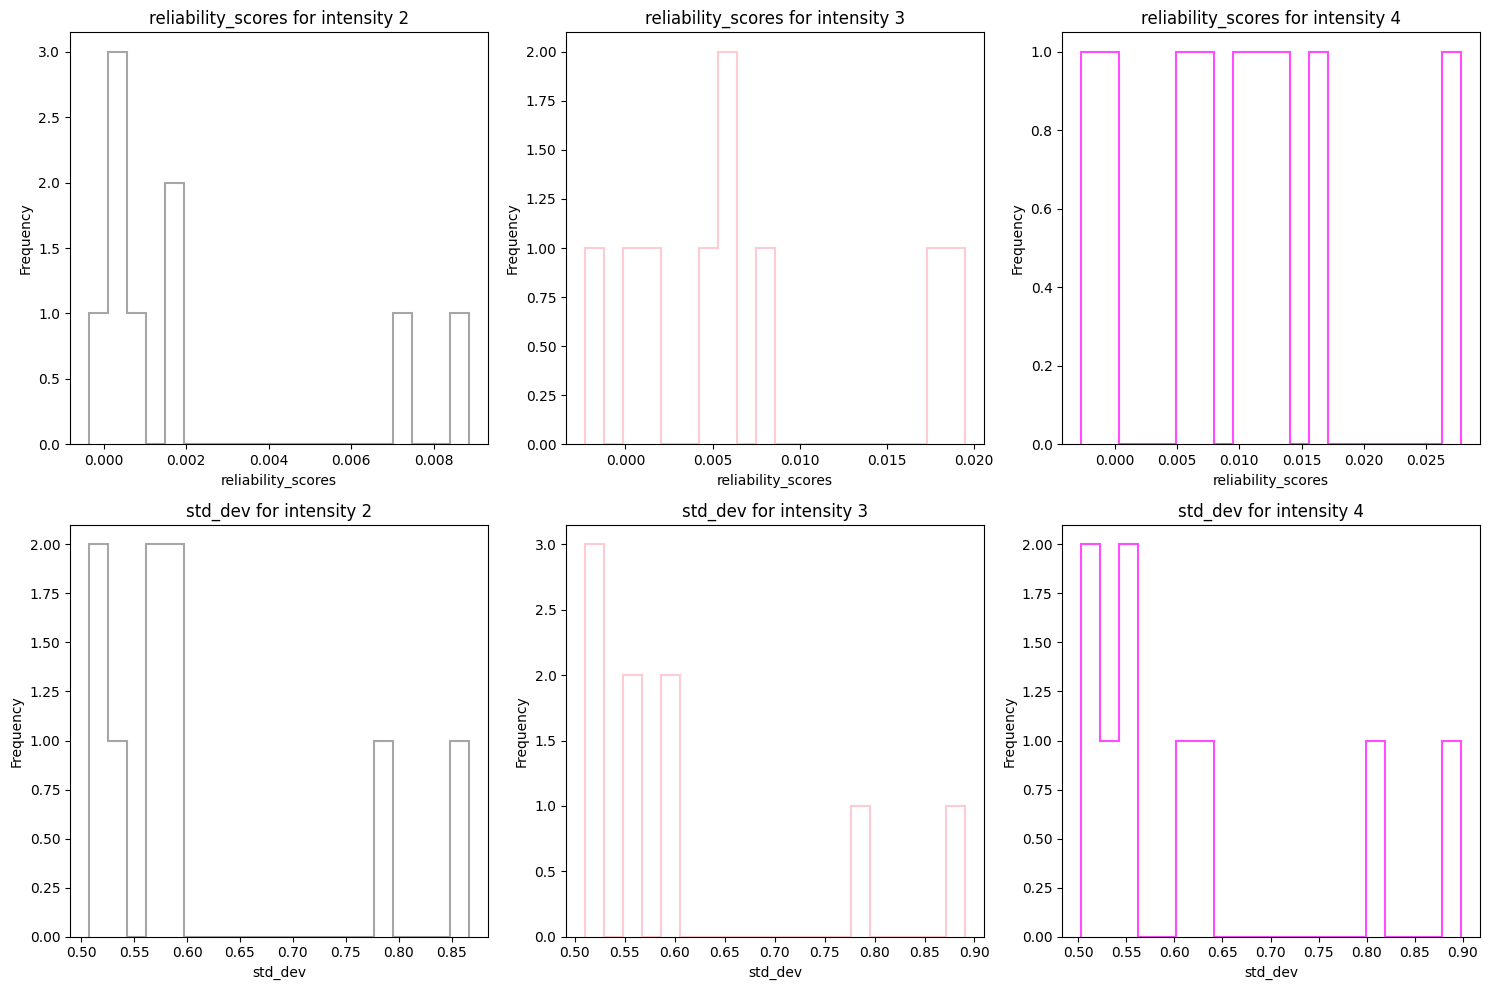

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histograms(results, combined=False, bin_size=0.1):
    if combined:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        colors = ['grey', 'lightpink', 'fuchsia']
        
        for i, metric in enumerate(['reliability_scores', 'std_dev']):
            bins = np.arange(0, 1.1, bin_size)
            for j, intensity in enumerate([2, 3, 4]):
                data = list(results[metric][intensity].values())
                valid_data = [x for x in data if not np.isnan(x)]
                
                axes[i].hist(valid_data, bins=bins, histtype='step', linewidth=1.5, alpha=0.7, color=colors[j], label=f'Intensity {intensity}')
            
            axes[i].set_title(f'{metric} for all intensities')
            axes[i].set_xlabel(metric)
            axes[i].set_ylabel('Frequency')
            axes[i].legend()
    else:
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        colors = ['grey', 'lightpink', 'fuchsia']
        
        for i, metric in enumerate(['reliability_scores', 'std_dev']):
            for j, intensity in enumerate([2, 3, 4]):
                data = list(results[metric][intensity].values())
                valid_data = [x for x in data if not np.isnan(x)]
                
                axes[i, j].hist(valid_data, bins=20, histtype='step', linewidth=1.5, color=colors[j], alpha=0.7)
                axes[i, j].set_title(f'{metric} for intensity {intensity}')
                axes[i, j].set_xlabel(metric)
                axes[i, j].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Example usage:
plot_histograms(results, combined=True, bin_size=0.1)  # To plot histograms combined with a specified bin size
plot_histograms(results, combined=False)  # To plot histograms separately (default bin size)


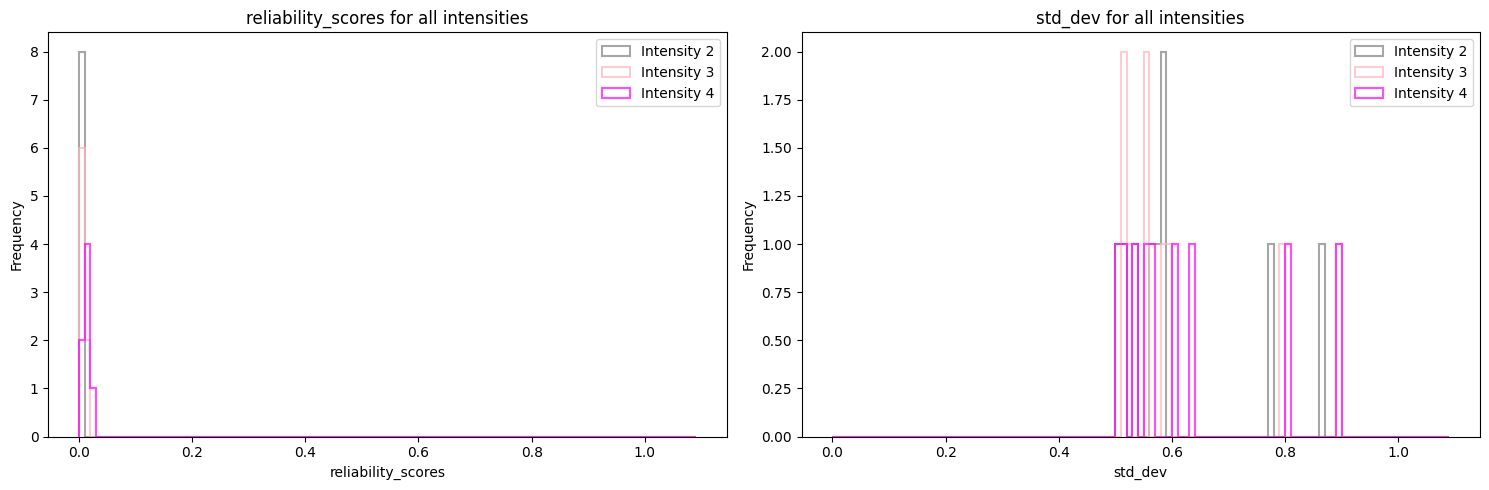

In [33]:
plot_histograms(results, combined=True, bin_size=0.01)  # To plot histograms combined with a specified bin size

In [34]:
reliability_scores_by_stim

{'reliability_scores': {2: {'69d625b1ee3dd0d024ae59d92baeb60d2eee6295663dbc4d80b58e344681825a': 0.008847561977160452,
   'c8f5e0605522dfc696ff79b9782300ad3a90175ad0f6e910274d968d39c082e4': 0.007300215981605421,
   '9a1b248f29d745b2161ce7b4a356007c485094beb24cd10533e13de7a41469ee': 0.0016332653208421316,
   '106934acff6e7b2f2aee3d4d2ce97cf134325f62b350cf9900bb421ce94f7699': 0.0014900182716896012,
   'f1daef362b4732d8f38bb4d1e5d3489ab24c80d08048f2ff11af0941fc596b22': 0.0008785163302403876,
   'a9ce24339695fe51e2e185ee7d8bae2850934481caa3568d38e1ec5289322fed': 0.0004834592927092821,
   'fb6bf3d64e06276869f359aebc0d5f70b70d7305314997ba455983f45b7158bf': 0.00018442040953130148,
   '9fc0d2767bd8cd4ae04ad00b6347491b44e8e9553968a155f383c9ee43aee73a': 0.00013000154414437334,
   'd0439daf4b362c9f078817951716e0c8c6bc1809ae17d83336cc6039136ded3f': -0.00035248567146358334},
  3: {'d0439daf4b362c9f078817951716e0c8c6bc1809ae17d83336cc6039136ded3f': 0.019498657704991363,
   'c8f5e0605522dfc696ff79b978

In [48]:
def get_top_units_by_intensity(reliability_scores_by_stim, N=3):
    top_units_by_intensity = {}
    
    for intensity in [2, 3, 4]:
        reliability_scores = reliability_scores_by_stim['reliability_scores'][intensity]
        sorted_reliability_scores = dict(sorted(reliability_scores.items(), key=lambda item: item[1], reverse=True))
        top_N_units = list(sorted_reliability_scores.keys())[:N]
        top_units_by_intensity[intensity] = top_N_units

    return top_units_by_intensity

top_units_by_intensity = get_top_units_by_intensity(reliability_scores_by_stim, N=3)
print(top_units_by_intensity)




{2: ['69d625b1ee3dd0d024ae59d92baeb60d2eee6295663dbc4d80b58e344681825a', 'c8f5e0605522dfc696ff79b9782300ad3a90175ad0f6e910274d968d39c082e4', '9a1b248f29d745b2161ce7b4a356007c485094beb24cd10533e13de7a41469ee'], 3: ['d0439daf4b362c9f078817951716e0c8c6bc1809ae17d83336cc6039136ded3f', 'c8f5e0605522dfc696ff79b9782300ad3a90175ad0f6e910274d968d39c082e4', '9a1b248f29d745b2161ce7b4a356007c485094beb24cd10533e13de7a41469ee'], 4: ['c8f5e0605522dfc696ff79b9782300ad3a90175ad0f6e910274d968d39c082e4', '69d625b1ee3dd0d024ae59d92baeb60d2eee6295663dbc4d80b58e344681825a', '9a1b248f29d745b2161ce7b4a356007c485094beb24cd10533e13de7a41469ee']}


In [ ]:
EED.unit_id_map  # Should print a dictionary with group names as keys and lists of unit IDs as values

In [ ]:
x = EED.get_unit_data('3e810c30e3803e4bbe54d259dc3f7e459ffd597532e43d53c5cb62f712c8f309') # Should print a list of keys in the dictionary
x['SpikeTimes_all']

In [ ]:
EED.get_metric('3e810c30e3803e4bbe54d259dc3f7e459ffd597532e43d53c5cb62f712c8f309', 'SpikeTimes_all') # Should print the value of the first key in the dictionary

In [ ]:
amplitudes = EED.iterate_unit_ids(ExtractEphysData.get_amplitude)

In [ ]:
EED

In [ ]:
#test the methods of the class
EED.load_matfiles_printdata()
EED.get_original_cellid('4bc09822d0832f7c00be68d2fb7a01dc') #get the original cell id for a given unit id
EED.get_pre_data('4bc09822d0832f7c00be68d2fb7a01dc') #get the pre data for a given unit id


In [ ]:
for group in EED.get_group_names():
    for recoring in EED.get_recording_names(group):
        print(recoring)
        

In [ ]:
#x = EED.construct_stimulus_table('lmc_ch_1_3094_rec1') #construct stimulus table for a given recording 
EED.get_spike_times('d13dc3f7b56073dbfaf20b30168c1886') #get spike times for a given unit id

In [ ]:
unit_data = EED.get_unit_level_data()

In [ ]:
key_names = EED.get_unit_data_keys('4bc09822d0832f7c00be68d2fb7a01dc')
print(key_names)

In [ ]:
unit_data_df = EED.get_unit_table()
unit_data_df.head()# Print the first few rows of the DataFrame to check the output
#check the shape of the dataframe
unit_data_df.shape

In [ ]:
# Create an instance of the UnitDataAnalysis class with the unit data DataFrame
analysis = UnitDataAnalysis(unit_data_df)
analysis.convert_samples2seconds()


In [ ]:
#access thhe data in the analysis class 
analysis.unit_data['Group'].unique() #get the unique values in the group column

In [ ]:
analysis.calculate_and_plot_firing_rate_matrix(bin_size=10)
    
    

In [ ]:
test = calculate_mean_responses(EED)

In [ ]:
print(test.keys()) #these are the group names
print(test['Lmc_opsin'].keys()) #these are the pre and post epoch names for each group
print(test['Lmc_opsin']['Pre']) #these are the cell names for each epoch

In [ ]:
# Assuming `mean_responses_data` is the dictionary obtained from the calculate_mean_responses function
plotter = ResponseDistributionPlotter(test)
plotter.plot_distribution('Lmc_opsin', 'Pre', 'Pooled', bins=100, overlay=True, phase='early') 
plotter.plot_distribution('Lmc_opsin', 'Post', 'Pooled', bins=100, overlay=True, phase='early')

# Assuming `mean_responses_data` is the dictionary obtained from the calculate_mean_responses function
plotter = ResponseDistributionPlotter(test)
plotter.plot_distribution('Lmc_opsin', 'Pre', 'Pooled', bins=100, overlay=True, phase='late') 
plotter.plot_distribution('Lmc_opsin', 'Post', 'Pooled', bins=100, overlay=True, phase='late')

In [ ]:
# plotter.plot_distribution('Lmc_opsin', epoch=None, stim_level='Zero', overlay=True)
#plot the distribution for pre and post stim levels separately
plotter.plot_distribution('Lmc_opsin', epoch='Pre', stim_level='Zero', overlay=True)
plotter.plot_distribution('Lmc_opsin', epoch='Post', stim_level='Zero', overlay=True)

# Plotting 'Pre' and 'Post' distributions on top of each other by setting overlay=True 
#loop over the 'Zero', 'Low', 'Mid', 'Max', or 'Pooled' stim levels to plot the distributions for each stim level
for stim_level in ['Zero', 'Low', 'Mid', 'Max', 'Pooled']: 
    plotter.plot_distribution('Lmc_opsin', epoch=None, stim_level=stim_level, overlay=True)
    
    

In [ ]:
#plot the pre and post for the low separated 
plotter.plot_distribution('Lmc_opsin', epoch='Pre', stim_level='Low', bins=100)
plotter.plot_distribution('Lmc_opsin', epoch='Post', stim_level='Low', bins=100)

#plot the pre and post for the high separated
plotter.plot_distribution('Lmc_opsin', epoch='Pre', stim_level='Max', bins=100)
plotter.plot_distribution('Lmc_opsin', epoch='Post', stim_level='Max', bins=100)


In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_box_and_whisker(data, group_name, stim_levels=['Zero', 'Low', 'Mid', 'Max', 'Pooled'], epoch='both', overlay=False):
    """
    Plots a box and whisker plot of the mean responses for the specified group and stimulation levels.

    Parameters:
    - data (dict): The data dictionary containing the mean responses.
    - group_name (str): The name of the group to plot data for.
    - stim_levels (list or str): The stimulation levels to plot data for (e.g., ['Zero', 'Low', 'Mid', 'Max', 'Pooled'] or 'Zero'). Default is all levels.
    - epoch (str): The epoch to plot data for ('Pre', 'Post', or 'both'). Default is 'both'.
    - overlay (bool): Whether to overlay the 'Pre' and 'Post' data on a single plot. Default is False.
    """

    if isinstance(stim_levels, str):
        stim_levels = [stim_levels]

    # Get the mean responses for the specified group
    group_data = data[group_name]

    # Get the data to plot
    data_to_plot = defaultdict(list)
    epochs_to_plot = ['Pre', 'Post'] if epoch == 'both' else [epoch]
    for epoch in epochs_to_plot:
        for stim_level in stim_levels:
            stim_data = [unit_data[f'{epoch}_{stim_level}'] for unit_data in group_data[epoch]]
            data_to_plot[epoch].append(stim_data)

    # Create a new figure
    plt.figure()

    # Create a box plot for each epoch
    colors = {'Pre': 'grey', 'Post': 'blue'}
    for i, (epoch, stim_data) in enumerate(data_to_plot.items()):
        position = range(i * (len(stim_levels) + 1) + 1, (i + 1) * (len(stim_levels) + 1))
        bp = plt.boxplot(stim_data, positions=position, labels=stim_levels if i == 0 else [''] * len(stim_levels), patch_artist=True)
        
        # Set colors
        for box in bp['boxes']:
            box.set_facecolor(colors[epoch])
        
    # Set the plot title and labels
    plt.title(f'{group_name} Mean Responses')
    plt.ylabel('Mean Response')
    plt.xlabel('Stimulation Level')
    
    # Adding epoch labels
    if epoch == 'both':
        mid_point = len(stim_levels) / 2
        plt.text(mid_point, plt.gca().get_ylim()[1], 'Pre', ha='center', va='center', fontsize=12, fontweight='bold')
        plt.text(len(stim_levels) + 1 + mid_point, plt.gca().get_ylim()[1], 'Post', ha='center', va='center', fontsize=12, fontweight='bold')

    # Show the plot
    if not overlay:
        plt.show()

# Usage example:
# Assuming `data_dict` is your data dictionary obtained from `calculate_mean_responses` function
plot_box_and_whisker(test, 'Lmc_opsin', 'Zero', 'both')





In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_box_and_whisker(data, group_name, stim_levels=['Zero', 'Low', 'Mid', 'Max', 'Pooled'], epoch='both', overlay=False):
    """
    Plots a box and whisker plot of the mean responses for the specified group and stimulation levels.

    Parameters:
    - data (dict): The data dictionary containing the mean responses.
    - group_name (str): The name of the group to plot data for.
    - stim_levels (list or str): The stimulation levels to plot data for (e.g., ['Zero', 'Low', 'Mid', 'Max', 'Pooled'] or 'Zero'). Default is all levels.
    - epoch (str): The epoch to plot data for ('Pre', 'Post', or 'both'). Default is 'both'.
    - overlay (bool): Whether to overlay the 'Pre' and 'Post' data on a single plot. Default is False.
    """

    if isinstance(stim_levels, str):
        stim_levels = [stim_levels]

    # Get the mean responses for the specified group
    group_data = data[group_name]

    # Get the data to plot
    data_to_plot = defaultdict(list)
    epochs_to_plot = ['Pre', 'Post'] if epoch == 'both' else [epoch]
    for epoch in epochs_to_plot:
        for stim_level in stim_levels:
            stim_data = [unit_data[f'{epoch}_{stim_level}'] for unit_data in group_data[epoch]]
            data_to_plot[epoch].append(stim_data)

    # Create a new figure
    plt.figure()

    # Create a box plot for each epoch
    colors = {'Pre': 'grey', 'Post': 'blue'}
    for i, (epoch, stim_data) in enumerate(data_to_plot.items()):
        position = range(i * (len(stim_levels) + 1) + 1, (i + 1) * (len(stim_levels) + 1))
        labels = [f'{epoch}{level}' for level in stim_levels]
        bp = plt.boxplot(stim_data, positions=position, labels=labels, patch_artist=True)
        
        # Set colors
        for box in bp['boxes']:
            box.set_facecolor(colors[epoch])
        
    # Set the plot title and labels
    plt.title(f'{group_name} Mean Responses')
    plt.ylabel('Mean Response')
    plt.xlabel('Stimulation Level Epoch')
    
    # Show the plot
    if not overlay:
        plt.show()



# Usage example:

# Assuming `data_dict` is your data dictionary obtained from `calculate_mean_responses` function
plot_box_and_whisker(test, 'Lmc_opsin', 'Max', 'both')


In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_box_and_whisker(data, group_name, stim_levels=['Zero', 'Low', 'Mid', 'Max', 'Pooled'], epoch='both', overlay=False, plot_hist=False):
    """
    Plots a box and whisker plot of the mean responses for the specified group and stimulation levels.

    Parameters:
    - data (dict): The data dictionary containing the mean responses.
    - group_name (str): The name of the group to plot data for.
    - stim_levels (list or str): The stimulation levels to plot data for (e.g., ['Zero', 'Low', 'Mid', 'Max', 'Pooled'] or 'Zero'). Default is all levels.
    - epoch (str): The epoch to plot data for ('Pre', 'Post', or 'both'). Default is 'both'.
    - overlay (bool): Whether to overlay the 'Pre' and 'Post' data on a single plot. Default is False.
    - plot_hist (bool): Whether to plot the histogram distribution. Default is False.
    """

    if isinstance(stim_levels, str):
        stim_levels = [stim_levels]

    # Get the mean responses for the specified group
    group_data = data[group_name]

    # Get the data to plot
    data_to_plot = defaultdict(list)
    epochs_to_plot = ['Pre', 'Post'] if epoch == 'both' else [epoch]
    for epoch in epochs_to_plot:
        for stim_level in stim_levels:
            stim_data = [unit_data[f'{epoch}_{stim_level}'] for unit_data in group_data[epoch]]
            data_to_plot[epoch].append(stim_data)

    # Create a new figure
    plt.figure()

    # Create a box plot for each epoch
    colors = {'Pre': 'grey', 'Post': 'blue'}
    for i, (epoch, stim_data) in enumerate(data_to_plot.items()):
        position = range(i * (len(stim_levels) + 1) + 1, (i + 1) * (len(stim_levels) + 1))
        labels = [f'{epoch}_{level}' for level in stim_levels]
        bp = plt.boxplot(stim_data, positions=position, labels=labels, patch_artist=True)
        
        # Set colors
        for box in bp['boxes']:
            box.set_facecolor(colors[epoch])
        
    # Set the plot title and labels
    plt.title(f'{group_name} Mean Responses')
    plt.ylabel('Mean Response')
    plt.xlabel('Stimulation Level Epoch')
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)
    
    # Plot the histogram distribution if specified
    if plot_hist:
        plt.figure()
        for epoch in epochs_to_plot:
            for stim_level in stim_levels:
                stim_data = [unit_data[f'{epoch}_{stim_level}'] for unit_data in group_data[epoch]]
                plt.hist(stim_data, alpha=0.5, label=f'{epoch}_{stim_level}', color=colors[epoch], histtype='step')
        plt.xlabel('Mean Response')
        plt.ylabel('Frequency')
        plt.title(f'{group_name} Response Distributions')
        plt.legend()
    
    # Show the plot
    if not overlay:
        plt.show()


# Usage example:
# Assuming `data_dict` is your data dictionary obtained from `calculate_mean_responses` function
plot_box_and_whisker(test, 'Lmc_opsin', 'Zero', 'both', plot_hist=True)

# Assuming `data_dict` is your data dictionary obtained from your data processing
plot_box_and_whisker(test, group_name='Lmc_opsin')


In [ ]:
# Example 1: Basic Usage with Default Parameters
plot_box_and_whisker(test, group_name='Lmc_opsin')

#Example 2: Plotting for a Single Epoch with Histograms
plot_box_and_whisker(test, group_name='Lmc_opsin', epoch='Pre', plot_hist=True)

#Example 3: Plotting for Specific Stimulation Levels 
plot_box_and_whisker(test, group_name='Lmc_opsin', stim_levels=['Zero', 'Max'], plot_hist=True)

#Example 4: Overlaying 'Pre' and 'Post' Data on a Single Plot
plot_box_and_whisker(test, group_name='Lmc_opsin', overlay=True)

# Example 5: Plotting for a Single Stimulation Level
plot_box_and_whisker(test, group_name='Lmc_opsin', stim_levels='Zero', plot_hist=True)

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

def plot_regression(data, stimulation='Pooled', overlay=True, log_scale=False):
    
    pre_early = []
    pre_late = []
    post_early = []
    post_late = []

    for group in data.values():
        for epoch_data in group.values():
            for record in epoch_data:
                pre_early.append(record[f'Pre_{stimulation}_early'])
                pre_late.append(record[f'Pre_{stimulation}_late'])
                post_early.append(record[f'Post_{stimulation}_early'])
                post_late.append(record[f'Post_{stimulation}_late'])

    fig, ax = plt.subplots(1, 2 if not overlay else 1, figsize=(10, 5))

    if log_scale:
        pre_early = [np.log(x+1) for x in pre_early]
        pre_late = [np.log(x+1) for x in pre_late]
        post_early = [np.log(x+1) for x in post_early]
        post_late = [np.log(x+1) for x in post_late]

    if overlay:
        ax.scatter(pre_early, pre_late, color='grey', alpha=0.5, label='Pre')
        ax.scatter(post_early, post_late, color='blue', alpha=0.5, label='Post')
        
        # Adding simple linear regression lines
        slope, intercept, _, _, _ = stats.linregress(pre_early, pre_late)
        ax.plot(pre_early, np.array(pre_early)*slope + intercept, color='grey')
        
        slope, intercept, _, _, _ = stats.linregress(post_early, post_late)
        ax.plot(post_early, np.array(post_early)*slope + intercept, color='blue')
        
        ax.set_xlabel('Early Phase')
        ax.set_ylabel('Late Phase')
    else:
        ax[0].scatter(pre_early, pre_late, color='grey', alpha=0.5, label='Pre')
        ax[1].scatter(post_early, post_late, color='blue', alpha=0.5, label='Post')
        
        # Adding simple linear regression lines
        slope, intercept, _, _, _ = stats.linregress(pre_early, pre_late)
        ax[0].plot(pre_early, np.array(pre_early)*slope + intercept, color='grey')
        
        slope, intercept, _, _, _ = stats.linregress(post_early, post_late)
        ax[1].plot(post_early, np.array(post_early)*slope + intercept, color='blue')
        
        ax[0].set_xlabel('Early Phase')
        ax[0].set_ylabel('Late Phase')
        ax[1].set_xlabel('Early Phase')
        ax[1].set_ylabel('Late Phase')
        
        ax[0].legend()

    plt.legend()
    plt.show()

# Example commands to test the function
# Replace 'test' with your actual data dictionary
plot_regression(test, stimulation='Pooled', overlay=True, log_scale=True)
plot_regression(test, stimulation='Pooled', overlay=False, log_scale=True)
plot_regression(test, stimulation='Low', overlay=True, log_scale=False)


In [ ]:
print(type(test['Lmc_opsin']['Pre'])) #prints the type of the data
print(len(test['Lmc_opsin']['Pre'])) #print the number of units in the pre epoch of the Lmc_opsin group
print(test['Lmc_opsin']['Pre'][0].keys()) #print the keys of the first element in the list 

In [ ]:
print(type(test['Lmc_opsin']['Pre'])) #prints the type of the data
print(len(test['Lmc_opsin']['Pre'])) #print the number of units in the pre epoch of the Lmc_opsin group
print(test['Lmc_opsin']['Pre'][0].keys()) #print the keys of the first element in the list 

In [ ]:
from scipy import stats
import numpy as np

def calculate_pearson_correlations(EED, group_name=None):
    """
    Calculate the Pearson correlation coefficients using the individual trial responses from both the early and late windows during both the pre and post epochs for each unit.

    Parameters:
    EED (object): The object containing the electrophysiology data.
    group_name (str, optional): The name of the group to analyze. Defaults to None, in which case all groups are analyzed.

    Returns:
    dict: A dictionary containing the Pearson correlation coefficients for each unit.
    """
    
    # Get list of group names
    group_names = [group_name] if group_name else EED.group_names
    
    # Dictionary to store the Pearson correlation coefficients for each group
    pearson_correlations = {}
    
    # Loop through each group
    for group in group_names:
        recording_names = EED.get_recording_names(group)
        
        # Dictionary to store the Pearson correlation coefficients for all units in the current group
        group_pearson_correlations = {'Pre': [], 'Post': []}
        
        # Loop through each recording
        for recording in recording_names:
            cellid_names = EED.get_cellid_names(group, recording)
            
            # Loop through each cell ID
            for cell_id in cellid_names:
                # Get the pre and post stim data
                data = EED.get_pre_post_data(group, recording, cell_id)
                
                # Define stimulation levels and pooled stimulation levels
                stim_levels = ['Zero', 'Low', 'Mid', 'Max', 'Pooled']
                
                # Dictionary to store the Pearson correlation coefficients for the current unit
                unit_pearson_correlations = {'Recording': recording, 'CellID': cell_id}
                
                # Loop through each epoch (pre and post) and stimulation level to calculate Pearson correlation coefficients
                for epoch in ['Pre', 'Post']: #loop through the pre and post epochs
                    for stim_level in stim_levels: #loop through the stim levels
                        if stim_level == 'Pooled': #if the stim level is pooled, then use all stim levels
                            stim_indices = [1, 2, 3] #indices for the stim levels
                        else: #otherwise, use the stim level specified
                            stim_indices = [stim_levels.index(stim_level)] #create a list with the index of the stim level
                        
                        # Get spike trains for the current stimulation level
                        spiketrains = np.concatenate([data[epoch]['SpikeTrains_for_PSTHs'][i] for i in stim_indices], axis=0) #list comprehension to get the spike trains for the stim level by looping through the stim indices
                        
                        # Extract spike data for the early phase (0-50 ms post-stimulus)
                        early_phase = spiketrains[:, 500:550]  # Adjust indices as necessary
                        
                        # Extract spike data for the late phase (100-700 ms post-stimulus)
                        late_phase = spiketrains[:, 600:1200]  # Adjust indices as necessary
                        
                        # Calculate the total number of spikes in each trial during the early and late phases
                        early_response = early_phase.sum(axis=1) #sum across the rows which are the trials for the early phase
                        late_response = late_phase.sum(axis=1) #sum across the rows which are the trials for the late phase
                        
                        # Calculate the Pearson correlation coefficient for the early and late responses
                        corr, _ = stats.pearsonr(early_response, late_response)
                        
                        # Add the Pearson correlation coefficient to the dictionary
                        unit_pearson_correlations[f'{epoch}_{stim_level}_Pearson_Correlation'] = corr
                
                # Calculate the difference between post and pre Pearson correlation coefficients for each stimulation level
                for stim_level in stim_levels:
                    pre_corr = unit_pearson_correlations[f'Pre_{stim_level}_Pearson_Correlation']
                    post_corr = unit_pearson_correlations[f'Post_{stim_level}_Pearson_Correlation']
                    unit_pearson_correlations[f'{stim_level}_Correlation_Difference'] = post_corr - pre_corr
                
                # Add the Pearson correlation coefficients for the current unit to the list
                group_pearson_correlations['Pre'].append(unit_pearson_correlations)
                group_pearson_correlations['Post'].append(unit_pearson_correlations)
        
        # Add the Pearson correlation coefficients for the current group to the dictionary
        pearson_correlations[group] = group_pearson_correlations
    
    return pearson_correlations


# use the function
pearson_correlations = calculate_pearson_correlations(EED, group_name=None)

In [ ]:
pearson_correlations.keys() #prints the keys of the dictionary
pearson_correlations['Lmc_opsin'].keys() 
pearson_correlations['Lmc_opsin']['Pre'][0]

In [ ]:
print(list(pearson_correlations.values())[0].keys())

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def plot_correlation_differences(correlation_data, stimulation_level):
    """
    Plot the correlation differences for all units, ranked from least to most, for a specified stimulation level.

    Parameters:
    correlation_data (dict): The dictionary containing the Pearson correlation data for each unit.
    stimulation_level (str): The stimulation level to plot (one of 'Zero', 'Low', 'Mid', 'Max', 'Pooled').

    Returns:
    None: The function will plot the data but not return any values.
    """
    
    # Loop through each group in the correlation data
    for group_name, group_data in correlation_data.items():
        
        # List to store all units and their correlation differences
        all_units_correlation_differences = []

        # Loop through each unit in the 'Pre' epoch to get its correlation difference for the specified stimulation level
        for unit in group_data['Pre']:
            # Get the correlation difference for the current unit and the specified stimulation level
            correlation_difference = unit.get(f'{stimulation_level}_Correlation_Difference') # Returns None if the key doesn't exist
            
            # Skip units with invalid correlation differences
            if correlation_difference is None or np.isnan(correlation_difference):
                continue
            
            # Get the cell ID for the current unit
            cell_id = unit['CellID']
            
            # Add the unit's cell ID and correlation difference to the list
            all_units_correlation_differences.append((cell_id, correlation_difference))
        
        # Print the list of units and their correlation differences
        print(all_units_correlation_differences)  

        # Sort the units by their correlation differences from least to most
        sorted_units = sorted(all_units_correlation_differences, key=lambda x: x[1])
        
        # Get the cell IDs and correlation differences as separate lists
        cell_ids, correlation_differences = zip(*sorted_units)
        
        # Create a bar plot of the correlation differences
        plt.figure(figsize=(10, 6))
        
        # Create a colormap for the bar colors
        norm = mcolors.Normalize(vmin=-1, vmax=1)
        cmap = plt.cm.get_cmap('coolwarm')
        
        # Create a bar plot with colors based on the correlation differences
        plt.bar(range(len(correlation_differences)), correlation_differences, tick_label=cell_ids, color=cmap(norm(correlation_differences)))
        
        # Add a colorbar to the plot
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        plt.colorbar(sm, label='Correlation Difference')
        
        # Add labels and title to the plot
        plt.xlabel('Cell ID')
        plt.ylabel('Correlation Difference')
        plt.title(f'Correlation Differences for {stimulation_level} Stimulation in {group_name} group')
        
        # Rotate the x-axis labels for better readability
        plt.xticks(rotation=90)
        
        # Display the plot
        plt.show()



plot_correlation_differences(pearson_correlations, 'Mid')

#loop over the stimulation levels
for stimulation_level in ['Zero', 'Low', 'Mid', 'Max', 'Pooled']:
    plot_correlation_differences(pearson_correlations, stimulation_level)


In [ ]:
from scipy import stats
import numpy as np

def calculate_global_pearson_correlations(EED, group_name=None):
    """
    Calculate the Pearson correlation coefficients using the mean responses from both the early and late windows during both the pre and post epochs for each unit.

    Parameters:
    EED (object): The object containing the electrophysiology data.
    group_name (str, optional): The name of the group to analyze. Defaults to None, in which case all groups are analyzed.

    Returns:
    dict: A dictionary containing the Pearson correlation coefficients for each unit.
    """
    
    group_names = [group_name] if group_name else EED.group_names
    
    detailed_data = {}
    
    for group in group_names:
        recording_names = EED.get_recording_names(group)
        
        for recording in recording_names:
            cellid_names = EED.get_cellid_names(group, recording)
            
            for cell_id in cellid_names:
                data = EED.get_pre_post_data(group, recording, cell_id)
                
                stim_levels = ['Zero', 'Low', 'Mid', 'Max', 'Pooled']
                
                for epoch in ['Pre', 'Post']:
                    for stim_level in stim_levels:
                        if stim_level == 'Pooled':
                            stim_indices = [1, 2, 3]
                        else:
                            stim_indices = [stim_levels.index(stim_level)]
                        
                        spiketrains = np.concatenate([data[epoch]['SpikeTrains_for_PSTHs'][i] for i in stim_indices], axis=0)
                        
                        early_phase = spiketrains[:, 500:550]
                        late_phase = spiketrains[:, 600:1200]
                        
                        early_response = early_phase.sum(axis=1) / early_phase.shape[1]
                        late_response = late_phase.sum(axis=1) / late_phase.shape[1]
                        
                        early_mean = early_response.mean()
                        late_mean = late_response.mean()
                        
                        detailed_data.setdefault(group, {}).setdefault(recording, {}).setdefault(cell_id, {}).setdefault(epoch, {}).setdefault(stim_level, {
                            'early_phase': early_phase,
                            'late_phase': late_phase,
                            'early_response': early_response,
                            'late_response': late_response,
                            'early_mean': early_mean,
                            'late_mean': late_mean
                        })
    
    return detailed_data

# use the function
# detailed_data = calculate_global_pearson_correlations(EED, group_name=None)


# use the function
pearson_correlations_global = calculate_global_pearson_correlations(EED, group_name=None)


In [ ]:
pearson_correlations_global.keys() #prints the keys of the dictionary

In [ ]:
from scipy import stats

def calculate_pearson_correlations(EED, detailed_data):
    """
    Calculate the Pearson correlation coefficients using the mean responses from the detailed data.

    Parameters:
    EED (object): The object containing the electrophysiology data.
    detailed_data (dict): The dictionary containing the detailed data including early and late mean responses.

    Returns:
    dict: A dictionary containing the Pearson correlation coefficients for each stimulation level and epoch.
    dict: A dictionary containing the cell IDs that were removed due to NaN values.
    """

    pearson_correlations = {}
    removed_cell_ids = {}

    # Get list of group names
    group_names = EED.group_names

    # Define stimulation levels
    stim_levels = ['Zero', 'Low', 'Mid', 'Max', 'Pooled']

    # Loop through each group
    for group in group_names:
        group_correlations = {}

        # Loop through each epoch (pre and post) and stimulation level to calculate Pearson correlation coefficients
        for epoch in ['Pre', 'Post']: 
            for stim_level in stim_levels: 

                # Pool early and late means from all units for the current group, epoch, and stimulation level
                early_means = []
                late_means = []

                recording_names = EED.get_recording_names(group)
                for recording in recording_names:
                    cellid_names = EED.get_cellid_names(group, recording)
                    for cell_id in cellid_names:
                        early_mean = detailed_data[group][recording][cell_id][epoch][stim_level]['early_mean']
                        late_mean = detailed_data[group][recording][cell_id][epoch][stim_level]['late_mean']

                        if not np.isnan(early_mean) and not np.isnan(late_mean):
                            early_means.append(early_mean)
                            late_means.append(late_mean)
                        else:
                            removed_cell_ids.setdefault(group, {}).setdefault(recording, {}).setdefault(epoch, {}).setdefault(stim_level, []).append(cell_id)

                # Calculate the Pearson correlation coefficient
                if early_means and late_means:  # Ensure the lists are not empty
                    corr, _ = stats.pearsonr(early_means, late_means)
                else:
                    corr = None

                # Store the Pearson correlation coefficient in the dictionary
                group_correlations.setdefault(epoch, {}).setdefault(stim_level, corr)

        # Add the Pearson correlation coefficients for the current group to the dictionary
        pearson_correlations[group] = group_correlations

    return pearson_correlations, removed_cell_ids

# Use the function
pearson_correlations, removed_cell_ids = calculate_pearson_correlations(EED, pearson_correlations_global)


In [ ]:
pearson_correlations['Lmc_opsin']

In [ ]:
import numpy as np
import pandas as pd

def individual_unit_analysis(EED, group_name=None):
    """
    Perform a comprehensive individual unit analysis including descriptive statistics, 
    time series analysis, correlation analysis, visualization, response profiling, 
    and outlier identification.

    Parameters:
    EED (object): The object containing the electrophysiology data.
    group_name (str, optional): The name of the group to analyze. Defaults to None, in which case all groups are analyzed.

    Returns:
    dict: A dictionary containing the results of all the analyses for each unit.
    """
    
    # Get list of group names
    group_names = [group_name] if group_name else EED.group_names
    
    # Dictionary to store the analysis results for each group
    analysis_results = {}
    
    # Loop through each group
    for group in group_names:
        recording_names = EED.get_recording_names(group)
        
        # Dictionary to store the analysis results for all units in the current group
        group_analysis_results = {}
        
        # Loop through each recording
        for recording in recording_names:
            cellid_names = EED.get_cellid_names(group, recording)
            
            # Loop through each cell ID
            for cell_id in cellid_names:
                # Get the pre and post stim data
                data = EED.get_pre_post_data(group, recording, cell_id)
                
                # Define stimulation levels and pooled stimulation levels
                stim_levels = ['Zero', 'Low', 'Mid', 'Max', 'Pooled']
                
                # Dictionary to store the analysis results for the current unit
                unit_analysis_results = {'Recording': recording, 'CellID': cell_id}
                
                # Loop through each epoch (pre and post) and stimulation level to calculate descriptive statistics
                for epoch in ['Pre', 'Post']: #loop through the pre and post epochs
                    for stim_level in stim_levels: #loop through the stim levels
                        if stim_level == 'Pooled': #if the stim level is pooled, then use all stim levels
                            stim_indices = [1, 2, 3] #indices for the stim levels
                        else: #otherwise, use the stim level specified
                            stim_indices = [stim_levels.index(stim_level)] #create a list with the index of the stim level
                        
                        # Get spike trains for the current stimulation level
                        spiketrains = np.concatenate([data[epoch]['SpikeTrains_for_PSTHs'][i] for i in stim_indices], axis=0) #list comprehension to get the spike trains for the stim level by looping through the stim indices
                        
                        # Extract spike data for the early phase (0-50 ms post-stimulus)
                        early_phase = spiketrains[:, 500:550]  # Adjust indices as necessary
                        
                        # Extract spike data for the late phase (100-700 ms post-stimulus)
                        late_phase = spiketrains[:, 600:1200]  # Adjust indices as necessary
                        
                        # Calculate the total number of spikes in each trial during the early and late phases
                        early_response = early_phase.sum(axis=1) / early_phase.shape[0] # Normalize by the number of trials which is the number of rows
                        late_response = late_phase.sum(axis=1) / late_phase.shape[0] # Normalize by the number of trials which is the number of rows
                        
                        # Calculate descriptive statistics
                        early_mean = np.mean(early_response)
                        late_mean = np.mean(late_response)
                        early_median = np.median(early_response)
                        late_median = np.median(late_response)
                        early_std = np.std(early_response)
                        late_std = np.std(late_response) 
                        
                        # Calculate the mean of the standard deviations across trials
                        mean_std_early = np.mean(np.std(early_phase, axis=1))
                        mean_std_late = np.mean(np.std(late_phase, axis=1))
                        
                        # Step 2: Time Series Analysis
                        # Calculate the autocorrelation of the early and late responses
                        early_autocorr = np.correlate(early_response, early_response, mode='full')
                        late_autocorr = np.correlate(late_response, late_response, mode='full')
                        
                        # Step 3: Correlation Analysis
                        # Calculate the Pearson correlation coefficient between the early and late responses
                        corr, p_value = stats.pearsonr(early_response, late_response)

                        # Step 5: Creating Response Profiles
                        # Calculate the difference between the mean responses in the early and late phases
                        mean_response_difference = late_mean - early_mean
                        # Calculate the fold change relative to the early mean
                        fold_change = late_mean / early_mean if early_mean != 0 else np.nan
                        
 
                        # Store the data and descriptive statistics in the dictionary
                        unit_analysis_results[f'{epoch}_{stim_level}_early_phase'] = early_phase
                        unit_analysis_results[f'{epoch}_{stim_level}_late_phase'] = late_phase
                        unit_analysis_results[f'{epoch}_{stim_level}_early_response'] = early_response
                        unit_analysis_results[f'{epoch}_{stim_level}_late_response'] = late_response
                        unit_analysis_results[f'{epoch}_{stim_level}_early_mean'] = early_mean
                        unit_analysis_results[f'{epoch}_{stim_level}_late_mean'] = late_mean
                        unit_analysis_results[f'{epoch}_{stim_level}_early_median'] = early_median
                        unit_analysis_results[f'{epoch}_{stim_level}_late_median'] = late_median
                        unit_analysis_results[f'{epoch}_{stim_level}_early_std'] = early_std
                        unit_analysis_results[f'{epoch}_{stim_level}_late_std'] = late_std
                        unit_analysis_results[f'{epoch}_{stim_level}_mean_std_early'] = mean_std_early
                        unit_analysis_results[f'{epoch}_{stim_level}_mean_std_late'] = mean_std_late
                        
                        # Store the autocorrelation data in the dictionary
                        unit_analysis_results[f'{epoch}_{stim_level}_early_autocorr'] = early_autocorr
                        unit_analysis_results[f'{epoch}_{stim_level}_late_autocorr'] = late_autocorr
                        
                        # Store the Pearson correlation coefficient and the p-value in the dictionary
                        unit_analysis_results[f'{epoch}_{stim_level}_Pearson_Correlation'] = corr
                        unit_analysis_results[f'{epoch}_{stim_level}_P_value'] = p_value
                        
                        # Store the response profile metrics in the dictionary
                        unit_analysis_results[f'{epoch}_{stim_level}_mean_response_difference'] = mean_response_difference
                        unit_analysis_results[f'{epoch}_{stim_level}_fold_change'] = fold_change
                        
                # Add the analysis results for the current unit to the dictionary
                group_analysis_results[cell_id] = unit_analysis_results
        
        # Add the analysis results for the current group to the dictionary
        analysis_results[group] = group_analysis_results
        
    # Convert the nested dictionary to a pandas DataFrame for easy data manipulation and visualization
    analysis_results_df = pd.DataFrame.from_dict({(group_name, cell_id): analysis_results[group_name][cell_id] 
                                                  for group_name in analysis_results.keys() 
                                                  for cell_id in analysis_results[group_name].keys()},
                                                 orient='index')

    return  analysis_results, analysis_results_df




individual_unit_analysis_output, individual_unit_analysis_df_output = individual_unit_analysis(EED, group_name=None)



In [ ]:
individual_unit_analysis_df_output 

In [ ]:
individual_unit_analysis_output['Lmc_opsin']['cid102']['Post_Low_early_autocorr']

#now plot this data individual_unit_analysis_output['Lmc_opsin']['cid102']['Post_Low_early_autocorr']
plt.plot(individual_unit_analysis_output['Lmc_opsin']['cid93']['Post_Low_early_autocorr'])

In [ ]:
individual_unit_analysis_output['Lmc_opsin']['cid102']['Post_Low_Pearson_Correlation']
#now look at mid 
individual_unit_analysis_output['Lmc_opsin']['cid102']['Post_Mid_Pearson_Correlation']
#now look at max
individual_unit_analysis_output['Lmc_opsin']['cid102']['Post_Max_Pearson_Correlation'] 
#now look at zero
individual_unit_analysis_output['Lmc_opsin']['cid102']['Post_Zero_Pearson_Correlation']

#repeat this process for cid102 and print the pearson correlation coefficients for each stimulation level
print(individual_unit_analysis_output['Lmc_opsin']['cid102']['Post_Zero_Pearson_Correlation'])
print(individual_unit_analysis_output['Lmc_opsin']['cid102']['Post_Low_Pearson_Correlation'])
print(individual_unit_analysis_output['Lmc_opsin']['cid102']['Post_Mid_Pearson_Correlation'])
print(individual_unit_analysis_output['Lmc_opsin']['cid102']['Post_Max_Pearson_Correlation'])

#now print the mean for cid 102 for each stimulation level 
print(individual_unit_analysis_output['Lmc_opsin']['cid102']['Post_Zero_late_mean'])
print(individual_unit_analysis_output['Lmc_opsin']['cid102']['Post_Low_late_mean'])
print(individual_unit_analysis_output['Lmc_opsin']['cid102']['Post_Mid_late_mean'])
print(individual_unit_analysis_output['Lmc_opsin']['cid102']['Post_Max_late_mean'])



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.colors as mcolors
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots


class NeuralDataAnalysis:
    def __init__(self, EED, group_name=None, early_phase_indices=(500, 550), late_phase_indices=(600, 1200)):
        self.EED = EED
        self.group_name = group_name
        self.early_phase_indices = early_phase_indices
        self.late_phase_indices = late_phase_indices
        self.analysis_results = None
        self.analysis_df = None
        
    def individual_unit_analysis(self, early_phase_indices=(500, 550), late_phase_indices=(600, 1200)):
        """
        Perform a comprehensive individual unit analysis including descriptive statistics, 
        time series analysis, correlation analysis, visualization, response profiling, 
        and outlier identification.

        Parameters:
        EED (object): The object containing the electrophysiology data.
        group_name (str, optional): The name of the group to analyze. Defaults to None, in which case all groups are analyzed.

        Returns:
        dict: A dictionary containing the results of all the analyses for each unit.
        """
        
        # Get list of group names
        group_names = [self.group_name] if self.group_name else self.EED.group_names
        
        # Dictionary to store the analysis results for each group
        analysis_results = {}
        
        # Loop through each group
        for group in group_names:
            recording_names = EED.get_recording_names(group)
            
            # Dictionary to store the analysis results for all units in the current group
            group_analysis_results = {}
            
            # Loop through each recording
            for recording in recording_names:
                cellid_names = EED.get_cellid_names(group, recording)
                
                # Loop through each cell ID
                for cell_id in cellid_names:
                    # Get the pre and post stim data
                    data = EED.get_pre_post_data(group, recording, cell_id)
                    
                    # Define stimulation levels and pooled stimulation levels
                    stim_levels = ['Zero', 'Low', 'Mid', 'Max', 'Pooled']
                    
                    # Dictionary to store the analysis results for the current unit
                    unit_analysis_results = {'Recording': recording, 'CellID': cell_id}
                    
                    # Loop through each epoch (pre and post) and stimulation level to calculate descriptive statistics
                    for epoch in ['Pre', 'Post']: #loop through the pre and post epochs
                        for stim_level in stim_levels: #loop through the stim levels
                            if stim_level == 'Pooled': #if the stim level is pooled, then use all stim levels
                                stim_indices = [1, 2, 3] #indices for the stim levels
                            else: #otherwise, use the stim level specified
                                stim_indices = [stim_levels.index(stim_level)] #create a list with the index of the stim level
                            
                            # Get spike trains for the current stimulation level
                            spiketrains = np.concatenate([data[epoch]['SpikeTrains_for_PSTHs'][i] for i in stim_indices], axis=0) #list comprehension to get the spike trains for the stim level by looping through the stim indices
                            
                            # Store the spike trains in the dictionary
                            unit_analysis_results[f'{epoch}_{stim_level}_spiketrains'] = spiketrains
                            
                            # Extract spike data for the early and late phases using the provided indices
                            early_phase = spiketrains[:, early_phase_indices[0]:early_phase_indices[1]]
                            late_phase = spiketrains[:, late_phase_indices[0]:late_phase_indices[1]]
                            
                            # Calculate the total number of spikes in each trial during the early and late phases
                            early_response = early_phase.sum(axis=1) / early_phase.shape[0] # Normalize by the number of trials which is the number of rows
                            late_response = late_phase.sum(axis=1) / late_phase.shape[0] # Normalize by the number of trials which is the number of rows
                            
                            # Calculate descriptive statistics
                            early_mean = np.mean(early_response)
                            late_mean = np.mean(late_response)
                            early_median = np.median(early_response)
                            late_median = np.median(late_response)
                            early_std = np.std(early_response)
                            late_std = np.std(late_response) 
                            
                            # Calculate the mean of the standard deviations across trials
                            mean_std_early = np.mean(np.std(early_phase, axis=1))
                            mean_std_late = np.mean(np.std(late_phase, axis=1))
                            
                            # Step 2: Time Series Analysis
                            # Calculate the autocorrelation of the early and late responses
                            early_autocorr = np.correlate(early_response, early_response, mode='full')
                            late_autocorr = np.correlate(late_response, late_response, mode='full')
                            
                            # Step 3: Correlation Analysis
                            # Calculate the Pearson correlation coefficient between the early and late responses
                            corr, p_value = stats.pearsonr(early_response, late_response)

                            # Step 5: Creating Response Profiles
                            # Calculate the difference between the mean responses in the early and late phases
                            mean_response_difference = late_mean - early_mean
                            
                            # Calculate the fold change relative to the early mean
                            fold_change = late_mean / early_mean if early_mean != 0 else np.nan
                            
                            # Calculate the fold change and percent change using the early window of the pre-epoch to normalize the late window of the post-epoch
                            if epoch == 'Post':
                                pre_epoch_early_mean = unit_analysis_results[f'Pre_{stim_level}_early_mean']
                                fold_change_normalized = late_mean / pre_epoch_early_mean if pre_epoch_early_mean != 0 else np.nan
                                unit_analysis_results[f'{epoch}_{stim_level}_fold_change_normalized'] = fold_change_normalized
                                percent_change_normalized = ((late_mean - pre_epoch_early_mean) / pre_epoch_early_mean) * 100 if pre_epoch_early_mean != 0 else np.nan
                                unit_analysis_results[f'{epoch}_{stim_level}_percent_change_normalized'] = percent_change_normalized

                            
    
                            # Store the data and descriptive statistics in the dictionary
                            unit_analysis_results[f'{epoch}_{stim_level}_early_phase'] = early_phase
                            unit_analysis_results[f'{epoch}_{stim_level}_late_phase'] = late_phase
                            unit_analysis_results[f'{epoch}_{stim_level}_early_response'] = early_response
                            unit_analysis_results[f'{epoch}_{stim_level}_late_response'] = late_response
                            unit_analysis_results[f'{epoch}_{stim_level}_early_mean'] = early_mean
                            unit_analysis_results[f'{epoch}_{stim_level}_late_mean'] = late_mean
                            unit_analysis_results[f'{epoch}_{stim_level}_early_median'] = early_median
                            unit_analysis_results[f'{epoch}_{stim_level}_late_median'] = late_median
                            unit_analysis_results[f'{epoch}_{stim_level}_early_std'] = early_std
                            unit_analysis_results[f'{epoch}_{stim_level}_late_std'] = late_std
                            unit_analysis_results[f'{epoch}_{stim_level}_mean_std_early'] = mean_std_early
                            unit_analysis_results[f'{epoch}_{stim_level}_mean_std_late'] = mean_std_late
                            
                            # Store the autocorrelation data in the dictionary
                            unit_analysis_results[f'{epoch}_{stim_level}_early_autocorr'] = early_autocorr
                            unit_analysis_results[f'{epoch}_{stim_level}_late_autocorr'] = late_autocorr
                            
                            # Store the Pearson correlation coefficient and the p-value in the dictionary
                            unit_analysis_results[f'{epoch}_{stim_level}_Pearson_Correlation'] = corr
                            unit_analysis_results[f'{epoch}_{stim_level}_P_value'] = p_value
                            
                            # Store the response profile metrics in the dictionary
                            unit_analysis_results[f'{epoch}_{stim_level}_mean_response_difference'] = mean_response_difference
                            unit_analysis_results[f'{epoch}_{stim_level}_fold_change'] = fold_change
                            
                    # Add the analysis results for the current unit to the dictionary
                    group_analysis_results[cell_id] = unit_analysis_results
            
            # Add the analysis results for the current group to the dictionary
            analysis_results[group] = group_analysis_results
            
        # Convert the nested dictionary to a pandas DataFrame for easy data manipulation and visualization
        analysis_results_df = pd.DataFrame.from_dict({(group_name, cell_id): analysis_results[group_name][cell_id] 
                                                    for group_name in analysis_results.keys() 
                                                    for cell_id in analysis_results[group_name].keys()},
                                                    orient='index')


        # Set the analysis_results attribute with the results dictionary
        self.analysis_results = analysis_results
        self.analysis_df = analysis_results_df
        
        # Return the DataFrame for inspection
        return analysis_results_df, analysis_results

    def rank_units_by_metric(self, group_name, column_name, ascending=True):
        """
        Rank units within a specified group based on a specified metric (e.g., Pearson correlation, fold change).

        Parameters:
        group_name (str): The name of the group to rank the units for.
        column_name (str): The name of the column (metric) to base the rankings on.
        ascending (bool): Whether to rank in ascending order. Defaults to True.

        Returns:
        pd.DataFrame: A DataFrame containing the unit IDs and their respective rankings.
        """
        
        
        group_data = self.analysis_df.loc[group_name].copy()
        
        # Rank the units based on the specified column
        group_data['Rank'] = group_data[column_name].rank(ascending=ascending)
        
        # Get a DataFrame with only the Cell IDs and their rankings
        ranking_df = group_data[['CellID', 'Rank']]
        
        return ranking_df 



    def plot_ranked_units(self, group_name, column_name, ascending=True):
        """
        Plot the ranked units within a specified group based on a specified metric (e.g., Pearson correlation, fold change).

        Parameters:
        group_name (str): The name of the group to rank the units for.
        column_name (str): The name of the column (metric) to base the rankings on.
        ascending (bool): Whether to rank in ascending order. Defaults to True.

        Returns:
        None: The function will plot the data but not return any values.
        """
        
        # Get the ranking data
        ranking_df = self.rank_units_by_metric(group_name, column_name, ascending)
        
        # Get the data to plot
        group_data = self.analysis_df.loc[group_name]
        
        # Merge the ranking data with the group data to get the values for the specified column
        plot_data = group_data.merge(ranking_df, on='CellID')
        
        # Sort the data based on the rank
        plot_data.sort_values(by='Rank', inplace=True)
        
        # Get a colormap
        cmap = plt.get_cmap('viridis')
        
        # Get the range of data values to set the color range
        data_min = plot_data[column_name].min()
        data_max = plot_data[column_name].max()
        
        # Create a normalized color range based on the data values
        norm = mcolors.Normalize(vmin=data_min, vmax=data_max)
        
        # Get a list of colors based on the normalized data values
        colors = cmap(norm(plot_data[column_name].values))
        
        # Plot the data with the colors
        plt.figure(figsize=(10, 6))
        plt.bar(plot_data['CellID'], plot_data[column_name], color=colors)
        
        # Set labels, title, etc.
        plt.xlabel('Cell ID')
        plt.ylabel(column_name)
        plt.title(f'Ranking of Units in {group_name} based on {column_name}')
        plt.xticks(rotation=90)
        plt.grid(axis='y')
        
        # Add a colorbar to show the color mapping
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        plt.colorbar(sm)
        
        plt.show()
        
    def plot_mean_firing(self, stim_level, group_name=None):
        """
        This method plots the mean firing rates for individual units and the grand mean across units 
        during the early and late phases of the pre and post epochs. The early and late mean firing 
        rates are represented by lines connecting empty and filled circles, respectively. The grand 
        mean is represented by a red line.

        Parameters:
        stim_level (str): The stimulation level to consider ('Zero', 'Low', 'Mid', 'Max', or 'Pooled').
        group_name (str, optional): The name of the group to plot data for. If None, data for all groups are plotted.

        Returns:
        None: The method displays the plot but does not return any values.
        """
        
        # Ensure the analysis results DataFrame is available
        if self.analysis_df is None:
            print("Please run the individual_unit_analysis method first.")
            return

        # Get the list of group names
        group_names = [group_name] if group_name else self.EED.group_names
        
        # Create a 1x2 subplot with shared y-axis
        fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

        # Loop through each group
        for group in group_names:
            
            # Loop through each epoch (Pre and Post) to create the plots
            for i, epoch in enumerate(['Pre', 'Post']):
                early_means = self.analysis_df.loc[group, f'{epoch}_{stim_level}_early_mean']
                late_means = self.analysis_df.loc[group, f'{epoch}_{stim_level}_late_mean']
                
                unit_ids = self.analysis_df.loc[group].index.get_level_values(0).unique()
                
                # Lists to store the early and late means for all units
                early_means_list = []
                late_means_list = []
                
                # Loop through each unit to gather the early and late means
                for unit_id in unit_ids:
                    early_mean = early_means.loc[unit_id]
                    late_mean = late_means.loc[unit_id]
                    
                    early_means_list.append(early_mean)
                    late_means_list.append(late_mean)
                
                # Now you have lists of early and late means for all units, and you can plot lines connecting these values
                for j, unit_id in enumerate(unit_ids):
                    color = 'grey' if epoch == 'Pre' else 'blue'
                    axes[i].plot([1, 2], [early_means_list[j], late_means_list[j]], marker='o', markersize=5, markerfacecolor=color, markeredgecolor=color, linestyle='-', color=color)
                    axes[i].plot(1, early_means_list[j], marker='o', markersize=5, markerfacecolor='white', markeredgecolor=color, linestyle='-', color=color)
                
                # Calculate the grand mean for all units
                grand_mean_early = np.mean(early_means_list)
                grand_mean_late = np.mean(late_means_list)
                
                # Plot the grand mean
                axes[i].plot([1, 2], [grand_mean_early, grand_mean_late], marker='o', markersize=7, markerfacecolor='none', color='red', linewidth=2, label='Grand Mean')
                
                # Set the x-ticks labels and title
                axes[i].set_xticks([1, 2])
                axes[i].set_xticklabels(['Early-Phase', 'Late-Phase'])
                axes[i].set_title(f'{epoch} Epoch with {stim_level} Stimulation')
                axes[i].set_xlabel('Phase')
                axes[i].set_ylabel('Mean Firing Rate')
            
            # Display a legend in the second plot
            axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
            
            # Adjust the layout to prevent overlapping
            plt.tight_layout()
            
            # Display the plot
            plt.show()
            
    def plot_standard_deviation(self, stim_level, group_name=None):
        """
        This method plots the standard deviation of firing rates for individual units and the grand mean across units 
        during the early and late phases of the pre and post epochs. The early and late standard deviations 
        are represented by lines connecting empty and filled circles, respectively. The grand mean is represented 
        by a red line for the pre epoch and a green line for the post epoch.

        Parameters:
        stim_level (str): The stimulation level to consider ('Zero', 'Low', 'Mid', 'Max', or 'Pooled').
        group_name (str, optional): The name of the group to plot data for. If None, data for all groups are plotted.

        Returns:
        None: The method displays the plot but does not return any values.
        """
        
        # Ensure the analysis results DataFrame is available
        if self.analysis_df is None:
            print("Please run the individual_unit_analysis method first.")
            return

        # Get the list of group names
        group_names = [group_name] if group_name else self.EED.group_names
        
        # Create a 1x2 subplot with shared y-axis
        fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
        
        # Loop through each group
        for group in group_names:
            
            # Loop through each epoch (Pre and Post) to create the plots
            for i, epoch in enumerate(['Pre', 'Post']):
                early_stds = self.analysis_df.loc[group, f'{epoch}_{stim_level}_early_std']
                late_stds = self.analysis_df.loc[group, f'{epoch}_{stim_level}_late_std']
                
                unit_ids = self.analysis_df.loc[group].index.get_level_values(0).unique()
                
                # Lists to store the early and late standard deviations for all units
                early_stds_list = []
                late_stds_list = []
                
                # Loop through each unit to gather the early and late standard deviations
                for unit_id in unit_ids:
                    early_std = early_stds.loc[unit_id]
                    late_std = late_stds.loc[unit_id]
                    
                    early_stds_list.append(early_std)
                    late_stds_list.append(late_std)
                
                # Now you have lists of early and late standard deviations for all units, and you can plot lines connecting these values
                for j, unit_id in enumerate(unit_ids):
                    color = 'grey' if epoch == 'Pre' else 'blue'
                    axes[i].plot([1, 2], [early_stds_list[j], late_stds_list[j]], marker='o', markersize=5, markerfacecolor=color, markeredgecolor=color, linestyle='-', color=color)
                    axes[i].plot(1, early_stds_list[j], marker='o', markersize=5, markerfacecolor='white', markeredgecolor=color, linestyle='-', color=color)
                    

                
                # Calculate the grand mean for all units
                grand_mean_early = np.mean(early_stds_list)
                grand_mean_late = np.mean(late_stds_list)
                
                # Plot the grand mean
                axes[i].plot([1, 2], [grand_mean_early, grand_mean_late], marker='o', markersize=7, markerfacecolor='none', color='red', linewidth=2, label='Grand Mean')
                
                # Set the x-ticks labels and title
                # And update the x-ticks and labels as follows:
                axes[i].set_xticks([1, 2])
                axes[i].set_xticklabels(['Early-Phase', 'Late-Phase'])
                axes[i].set_title(f'{epoch} Epoch with {stim_level} Stimulation')
                axes[i].set_xlabel('Phase')
                axes[i].set_ylabel('Standard Deviation of Firing Rate')
            
            # Display a legend in the second plot
            axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
            
            # Adjust the layout to prevent overlapping
            plt.tight_layout()
            
            # Display the plot
            plt.show()
    def plot_fold_change(self, stim_level, group_name=None):
        """
        This method plots the fold change of firing rates for individual units and the grand mean across units 
        during the early and late phases of the pre and post epochs. The fold changes 
        are represented by lines connecting circles, with the baseline represented as 1. The grand mean is represented 
        by a red line.

        Parameters:
        stim_level (str): The stimulation level to consider ('Zero', 'Low', 'Mid', 'Max', or 'Pooled').
        group_name (str, optional): The name of the group to plot data for. If None, data for all groups are plotted.

        Returns:
        None: The method displays the plot but does not return any values.
        """
        
        # Ensure the analysis results DataFrame is available
        if self.analysis_df is None:
            print("Please run the individual_unit_analysis method first.")
            return

        # Get the list of group names
        group_names = [group_name] if group_name else self.EED.group_names
        
        # Create a 1x2 subplot with shared y-axis
        fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
        
        # Loop through each group
        for group in group_names:
            
            # Loop through each epoch (Pre and Post) to create the plots
            for i, epoch in enumerate(['Pre', 'Post']):
                
                fold_changes = self.analysis_df.loc[group, f'{epoch}_{stim_level}_fold_change']
                unit_ids = self.analysis_df.loc[group].index.get_level_values(0).unique()
                
                # Lists to store the fold changes for all units
                fold_changes_list = []
                
                # Loop through each unit to gather the fold changes
                for unit_id in unit_ids:
                    fold_change = fold_changes.loc[unit_id]
                    fold_changes_list.append(fold_change)
                
                # Now you have a list of fold changes for all units, and you can plot lines connecting these values
                for j, unit_id in enumerate(unit_ids):
                    color = 'grey' if epoch == 'Pre' else 'blue'
                    axes[i].plot([1, 2], [1, fold_changes_list[j]], marker='o', markersize=5, markerfacecolor=color, markeredgecolor=color, linestyle='-', color=color)
                    
                # Calculate the grand mean for all units
                grand_mean_baseline = 1  # The baseline is 1 for fold change
                grand_mean_fold_change = np.mean(fold_changes_list)
                
                # Plot the grand mean
                axes[i].plot([1, 2], [grand_mean_baseline, grand_mean_fold_change], marker='o', markersize=7, markerfacecolor='none', color='red', linewidth=2, label='Grand Mean')
                
                # Set the x-ticks labels and title
                axes[i].set_xticks([1, 2])
                axes[i].set_xticklabels(['Baseline', 'Fold Change'])
                axes[i].set_title(f'{epoch} Epoch with {stim_level} Stimulation')
                axes[i].set_xlabel('Phase')
                axes[i].set_ylabel('Fold Change of Firing Rate')
            
            # Display a legend in the second plot
            axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
            
            # Adjust the layout to prevent overlapping
            plt.tight_layout()
            
            # Display the plot
            plt.show()

    def compare_percent_changes_between_groups(self, group1_name, group2_name):
        # Ensure the analysis_df attribute is not None
        if self.analysis_df is None:
            raise ValueError("The analysis_df attribute is None. Please run the individual_unit_analysis method first.")

        # Define the stimulation levels
        stim_levels = ['Zero', 'Low', 'Mid', 'Max', 'Pooled']

        # Initialize an empty list to store the results of the t-tests
        t_test_results = []

        # Loop through each stimulation level to perform the t-tests
        for stim_level in stim_levels:
            # Get the percent changes for the current stimulation level for each group
            group1_data = self.analysis_df.loc[(group1_name, slice(None)), :][f'Post_{stim_level}_percent_change_normalized'].values
            group2_data = self.analysis_df.loc[(group2_name, slice(None)), :][f'Post_{stim_level}_percent_change_normalized'].values

            # Perform an independent t-test
            t_stat, p_val = stats.ttest_ind(group1_data, group2_data, nan_policy='omit')

            # Store the results in the list
            t_test_results.append({'Stimulation Level': stim_level, 't-statistic': t_stat, 'p-value': p_val})

        # Create a DataFrame from the t-test results
        #t_test_results_df = pd.DataFrame(t_test_results)

        # Print the t-test results
        #print(t_test_results_df)

        # Create a bar plot to visualize the p-values
        #sns.set(style="whitegrid")
        #plt.figure(figsize=(10, 6))
        #sns.barplot(x='Stimulation Level', y='p-value', data=t_test_results_df)
        #plt.axhline(y=0.05, color='r', linestyle='--')  # Add a line to indicate the 0.05 significance level
        #plt.title('Significance of Percent Changes (Group1 vs. Group2)')
        #plt.ylabel('p-value')
        #plt.xlabel('Stimulation Level')
        #plt.show()
        
        # Create a dictionary of p-values indexed by stimulation level
        p_values = {result['Stimulation Level']: result['p-value'] for result in t_test_results}
    
        # Return the dictionary of p-values at the end of the method
        return p_values
        
            
            
    def plot_fold_change_plotly(self, stim_level, group_name=None):
        """
        This method plots the fold change of firing rates for individual units and the grand mean across units 
        during the baseline and fold change phases of the pre and post epochs using Plotly for interactive visualization. 
        The baseline and fold change values are represented by lines connecting markers at x=1 and x=2, respectively. 
        The grand mean is represented by a red line for the pre epoch and a green line for the post epoch.

        Parameters:
        stim_level (str): The stimulation level to consider ('Zero', 'Low', 'Mid', 'Max', or 'Pooled').
        group_name (str, optional): The name of the group to plot data for. If None, data for all groups are plotted.

        Returns:
        None: The method displays the plot but does not return any values.
        """
        
        # Ensure the analysis results DataFrame is available
        if self.analysis_df is None:
            print("Please run the individual_unit_analysis method first.")
            return

        # Get the list of group names
        group_names = [group_name] if group_name else self.EED.group_names
        
        # Loop through each group
        for group in group_names:
            
            # Create a Plotly figure
            fig = go.Figure()
            
            # Loop through each epoch (Pre and Post) to create the plots
            for i, epoch in enumerate(['Pre', 'Post']):
                fold_changes = self.analysis_df.loc[group, f'{epoch}_{stim_level}_fold_change']
                
                unit_ids = self.analysis_df.loc[group].index.get_level_values(0).unique()
                
                # Lists to store the baseline and fold change values for all units
                baseline_list = [1] * len(unit_ids)
                fold_changes_list = []
                
                # Loop through each unit to gather the baseline and fold change values
                for unit_id in unit_ids:
                    fold_change = fold_changes.loc[unit_id]
                    fold_changes_list.append(fold_change)
                
                # Now you have lists of baseline and fold change values for all units, and you can plot lines connecting these values
                for j, unit_id in enumerate(unit_ids):
                    color = 'grey' if epoch == 'Pre' else 'blue'
                    fig.add_trace(go.Scatter(x=[1, 2], y=[1, fold_changes_list[j]], mode='lines+markers', marker=dict(color=color), line=dict(color=color), name=f'{unit_id} {epoch}', hovertemplate=f'Unit ID: {unit_id}<br>Phase: '+'%{x}<br>Fold Change: '+'%{y}'))

                # Calculate the grand mean for all units
                grand_mean_baseline = np.nanmean(baseline_list)
                grand_mean_fold_change = np.nanmean(fold_changes_list)
                
                
                # Plot the grand mean
                color = 'red' if epoch == 'Pre' else 'green'
                fig.add_trace(go.Scatter(x=[1, 2], y=[grand_mean_baseline, grand_mean_fold_change], mode='lines+markers', marker=dict(color=color), line=dict(color=color, width=2), name=f'Grand Mean {epoch}'))
            
            # Set the x-ticks labels and title            
            fig.update_layout(
                xaxis=dict(tickvals=[1, 2], ticktext=['Baseline', 'Fold Change']),
                title=f'Fold Change with {stim_level} Stimulation for group {group}',
                xaxis_title='Phase',
                yaxis_title='Fold Change',
                template='plotly_white',  # Change the template here
                width=800,  # Set the width of the plot (in pixels)
                height=600,  # Set the height of the plot (in pixels)
            )
            # Get the total number of traces (2 grand means + number of units for pre and post)
            num_traces = len(fig.data)

            # Define the dropdown buttons with dynamic visibility lists
            buttons = [
                dict(
                    args=[{'visible': [True] * num_traces}],  # Show all traces (both pre and post)
                    label='Both',
                    method='update'
                ),
                dict(
                    args=[{'visible': [True if i < num_traces // 2 else False for i in range(num_traces)]}],  # Show only pre traces
                    label='Pre',
                    method='update'
                ),
                dict(
                    args=[{'visible': [False if i < num_traces // 2 else True for i in range(num_traces)]}],  # Show only post traces
                    label='Post',
                    method='update'
                )
            ]

            # Add the dropdown buttons to the figure
            fig.update_layout(
                updatemenus=[
                    dict(
                        x=1.15,
                        y=1.2,
                        xanchor='left',
                        yanchor='top',
                        buttons=buttons
                    )
                ]
            )
            # Display the plot
            fig.show()

    def plot_standard_deviation_plotly(self, stim_level, group_name=None, data_type='both'):
            # Ensure the analysis results DataFrame is available
            if self.analysis_df is None:
                print("Please run the individual_unit_analysis method first.")
                return

            # Get the list of group names
            group_names = [group_name] if group_name else self.EED.group_names
            
            # Loop through each group
            for group in group_names:
                
                # Create a Plotly figure
                fig = go.Figure()
                
                # Loop through each epoch (Pre and Post) to create the plots
                for i, epoch in enumerate(['Pre', 'Post']):
                    
                    # Get the standard deviations for the early and late phases
                    early_std_devs = self.analysis_df.loc[group, f'{epoch}_{stim_level}_early_std']
                    late_std_devs = self.analysis_df.loc[group, f'{epoch}_{stim_level}_late_std']
                    
                    unit_ids = self.analysis_df.loc[group].index.get_level_values(0).unique()
                    
                    # Loop through each unit to gather the standard deviation values for early and late phases
                    for unit_id in unit_ids:
                        early_std_dev = early_std_devs.loc[unit_id]
                        late_std_dev = late_std_devs.loc[unit_id]
                        
                        color = 'grey' if epoch == 'Pre' else 'blue'
                        fig.add_trace(go.Scatter(x=['Early', 'Late'], y=[early_std_dev, late_std_dev], mode='lines+markers', marker=dict(color=color), line=dict(color=color), name=f'{unit_id} {epoch}', hovertemplate=f'Unit ID: {unit_id}<br>Phase: '+'%{x}<br>Std Dev: '+'%{y}'))
                    
                    # Get the mean standard deviations across units for early and late phases
                    mean_early_std_dev = np.nanmean(early_std_devs)
                    mean_late_std_dev = np.nanmean(late_std_devs)

                    color = 'red' if epoch == 'Pre' else 'green'
                    fig.add_trace(go.Scatter(x=['Early', 'Late'], y=[mean_early_std_dev, mean_late_std_dev], mode='lines+markers', marker=dict(color=color), line=dict(color=color, width=2), name=f'Mean Std Dev {epoch}'))
            
            # Set the x-ticks labels and title            
            fig.update_layout(
                xaxis=dict(tickvals=[0, 1], ticktext=['Early', 'Late']),
                title=f'Standard Deviation with {stim_level} Stimulation for group {group}',
                xaxis_title='Phase',
                yaxis_title='Standard Deviation',
                template='plotly_white',
                width=800,
                height=600,
            )
            
            # Get the total number of traces (2 grand means + number of units for pre and post)
            num_traces = len(fig.data)

            # Define the dropdown buttons with dynamic visibility lists
            buttons = [
                dict(
                    args=[{'visible': [True] * num_traces}],  # Show all traces (both pre and post)
                    label='Both',
                    method='update'
                ),
                dict(
                    args=[{'visible': [True if i < num_traces // 2 else False for i in range(num_traces)]}],  # Show only pre traces
                    label='Pre',
                    method='update'
                ),
                dict(
                    args=[{'visible': [False if i < num_traces // 2 else True for i in range(num_traces)]}],  # Show only post traces
                    label='Post',
                    method='update'
                )
            ]

            # Add the dropdown buttons to the figure
            fig.update_layout(
                updatemenus=[           
                    dict(
                        x=1.15,
                        y=1.2,
                        xanchor='left',
                        yanchor='top',
                        buttons=buttons
                    )
                ]
            )
            
            # Display the plot
            fig.show()
            
            
    def plot_mean_firing_rate_plotly(self, stim_level, group_name=None):
        # Ensure the analysis results DataFrame is available
        if self.analysis_df is None:
            print("Please run the individual_unit_analysis method first.")
            return

        # Get the list of group names
        group_names = [group_name] if group_name else self.EED.group_names
        
        # Loop through each group
        for group in group_names:
            
            # Create a Plotly figure
            fig = go.Figure()
            
            # Loop through each epoch (Pre and Post) to create the plots
            for i, epoch in enumerate(['Pre', 'Post']):
                
                # Get the mean firing rates for the early and late phases
                early_mean_rates = self.analysis_df.loc[group, f'{epoch}_{stim_level}_early_mean']
                late_mean_rates = self.analysis_df.loc[group, f'{epoch}_{stim_level}_late_mean']
                
                unit_ids = self.analysis_df.loc[group].index.get_level_values(0).unique()
                
                # Loop through each unit to gather the mean firing rates for early and late phases
                for unit_id in unit_ids:
                    early_mean_rate = early_mean_rates.loc[unit_id]
                    late_mean_rate = late_mean_rates.loc[unit_id]
                    
                    color = 'grey' if epoch == 'Pre' else 'blue'
                    fig.add_trace(go.Scatter(x=['Early', 'Late'], y=[early_mean_rate, late_mean_rate], mode='lines+markers', marker=dict(color=color), line=dict(color=color), name=f'{unit_id} {epoch}', hovertemplate=f'Unit ID: {unit_id}<br>Phase: '+'%{x}<br>Mean Rate: '+'%{y}'))
                
                # Get the grand mean firing rates across units for early and late phases
                grand_mean_early = np.nanmean(early_mean_rates)
                grand_mean_late = np.nanmean(late_mean_rates)

                color = 'red' if epoch == 'Pre' else 'green'
                fig.add_trace(go.Scatter(x=['Early', 'Late'], y=[grand_mean_early, grand_mean_late], mode='lines+markers', marker=dict(color=color), line=dict(color=color, width=2), name=f'Grand Mean {epoch}'))
            
            # Set the x-ticks labels and title            
            fig.update_layout(
                xaxis=dict(tickvals=[0, 1], ticktext=['Early', 'Late']),
                title=f'Mean Firing Rate with {stim_level} Stimulation for group {group}',
                xaxis_title='Phase',
                yaxis_title='Mean Firing Rate',
                template='plotly_white',
                width=800,
                height=600,
            )
            
            # Get the total number of traces (2 grand means + number of units for pre and post)
            num_traces = len(fig.data)

            # Define the dropdown buttons with dynamic visibility lists
            buttons = [
                dict(
                    args=[{'visible': [True] * num_traces}],  # Show all traces (both pre and post)
                    label='Both',
                    method='update'
                ),
                dict(
                    args=[{'visible': [True if i < num_traces // 2 else False for i in range(num_traces)]}],  # Show only pre traces
                    label='Pre',
                    method='update'
                ),
                dict(
                    args=[{'visible': [False if i < num_traces // 2 else True for i in range(num_traces)]}],  # Show only post traces
                    label='Post',
                    method='update'
                )
            ]

            # Add the dropdown buttons to the figure
            fig.update_layout(
                updatemenus=[
                    dict(
                        x=1.15,
                        y=1.2,
                        xanchor='left',
                        yanchor='top',
                        buttons=buttons
                    )
                ]
            )
            
            # Display the plot
            fig.show()
            

    def plot_group_responses(self, group_name):
        # Ensure the analysis results DataFrame is available
        if self.analysis_df is None:
            print("Please run the individual_unit_analysis method first.")
            return

        # Get the unique unit IDs for the specified group
        unit_ids = self.analysis_df.loc[group_name].index.get_level_values(0).unique()

        # Create a Plotly figure
        fig = go.Figure()

        # Loop through each unit ID to add a scatter plot trace for each combination of epoch, stim level, and phase
        for unit_id in unit_ids:
            for epoch in ['Pre', 'Post']:
                for stim_level in ['Zero', 'Low', 'Mid', 'Max', 'Pooled']:
                    for phase in ['early', 'late']:
                        response = self.analysis_df.loc[(group_name, unit_id), f'{epoch}_{stim_level}_{phase}_response']
                        fig.add_trace(go.Scatter(x=list(range(len(response))), y=response, mode='markers', name=f'{unit_id} {epoch} {stim_level} {phase}'))

        # Create a dictionary to store the current visibility state of each option
        current_visibility = {'epoch': ['Pre', 'Post'], 'stim_level': ['Zero', 'Low', 'Mid', 'Max', 'Pooled'], 'phase': ['early', 'late']}

        # Define a function to update the visibility of the traces based on the selected options
        def update_visibility(option_type, option_value):
            if option_value in ['Both', 'All']:
                current_visibility[option_type] = ['Pre', 'Post'] if option_type == 'epoch' else ['Zero', 'Low', 'Mid', 'Max', 'Pooled'] if option_type == 'stim_level' else ['early', 'late']
            else:
                current_visibility[option_type] = [option_value]
            return [all(any(option in trace.name for option in current_visibility[option_type]) for option_type in current_visibility) for trace in fig.data]

        # Define dropdown menus to control visibility of traces
        epoch_buttons = [
            dict(label=epoch, method="update", args=[{"visible": update_visibility('epoch', epoch)}]) for epoch in ['Pre', 'Post', 'Both']
        ]
        stim_level_buttons = [
            dict(label=stim_level, method="update", args=[{"visible": update_visibility('stim_level', stim_level)}]) for stim_level in ['Zero', 'Low', 'Mid', 'Max', 'Pooled', 'All']
        ]
        phase_buttons = [
            dict(label=phase, method="update", args=[{"visible": update_visibility('phase', phase)}]) for phase in ['early', 'late', 'Both']
        ]

        # Add dropdown menus to the figure
        fig.update_layout(
            updatemenus=[
                dict(
                    x=1.15,
                    y=1.2,
                    xanchor='left',
                    yanchor='top',
                    buttons=epoch_buttons
                ),
                dict(
                    x=1.15,
                    y=1.1,
                    xanchor='left',
                    yanchor='top',
                    buttons=stim_level_buttons
                ),
                dict(
                    x=1.15,
                    y=1.0,
                    xanchor='left',
                    yanchor='top',
                    buttons=phase_buttons
                )
            ]
        )

        # Display the plot
        fig.show()
        
    def plot_group_responses_histogram(self, group_name, nbinsx=100):
        """
        Plot a histogram of the responses for a specified group.

        Parameters:
        group_name (str): The name of the group to plot.
        nbinsx (int, optional): The number of bins for the histogram. Defaults to 100.

        Returns:
        None
        """
        
        # Ensure the analysis results DataFrame is available
        if self.analysis_df is None:
            print("Please run the individual_unit_analysis method first.")
            return

        # Define the epochs, stimulation levels, and phases
        epochs = ['Pre', 'Post']
        stim_levels = ['Zero', 'Low', 'Mid', 'Max', 'Pooled']
        phases = ['early', 'late']

        # Define a list of colors to use for the different traces
        colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'yellow', 'grey', 'cyan']

        # Create a Plotly figure
        fig = go.Figure()

        # Loop through each epoch, stimulation level, and phase to create the plots
        from itertools import product
        for i, (epoch, stim_level, phase) in enumerate(product(epochs, stim_levels, phases)):
            response_data = self.analysis_df.loc[group_name, f'{epoch}_{stim_level}_{phase}_response'].values
            
            fig.add_trace(go.Histogram(
                x=response_data,
                nbinsx=nbinsx,  # Use the parameter to set the number of bins
                name=f'{epoch} {stim_level} {phase}',
                marker_color=colors[i % len(colors)],
                hoverinfo='x+y',
                hovertemplate='Count: %{y}<br>Response: %{x}<extra></extra>',
            ))

        # Define the dropdown buttons with dynamic visibility lists
        buttons = [
            dict(
                args=[{'visible': [True] * len(fig.data)}], 
                label='All',
                method='update'
            )
        ]
        for i, (epoch, stim_level, phase) in enumerate(product(epochs, stim_levels, phases)):
            visible = [False] * len(fig.data)
            visible[i] = True
            buttons.append(
                dict(
                    args=[{'visible': visible}], 
                    label=f'{epoch} {stim_level} {phase}',
                    method='update'
                )
            )

        # Add the dropdown buttons to the figure
        fig.update_layout(
            updatemenus=[
                dict(
                    x=1.15,
                    y=1.2,
                    xanchor='left',
                    yanchor='top',
                    buttons=buttons
                )
            ]
        )
        
        # Set the x-ticks labels and title            
        fig.update_layout(
            title=f'Response Histogram for {group_name} group',
            xaxis_title='Response',
            xaxis=dict(
                showticklabels=False,  # Hide x-axis labels
                showgrid=False  # Remove x-axis grid lines
            ),
            yaxis_title='Count',
            template='plotly_white',
            width=800,
            height=600,
        )
        
        # Display the plot
        fig.show()

    def plot_group_responses_histogramsubplots(self, group_name, nbinsx=20):
        # Define the stimulation levels and phases
        stim_levels = ['Zero', 'Low', 'Mid', 'Max', 'Pooled']
        phases = ['early', 'late']
        epochs = ['Pre', 'Post']

        # Get the unique unit IDs for the specified group
        unit_ids = self.analysis_df.loc[(group_name, slice(None)), :].index.get_level_values(1).unique()
        all_unit_ids = list(unit_ids)

        # Create a subplot with 2 rows and 2 columns
        fig = make_subplots(rows=2, cols=2, subplot_titles=('Pre Early', 'Pre Late', 'Post Early', 'Post Late'))

        # Function to get pooled data for the current selection of units
        def get_pooled_data(epoch, phase, stim_level, visible_unit_ids):
            pooled_data = []
            for unit_id in visible_unit_ids:
                data = self.analysis_df.loc[(group_name, unit_id), f'{epoch}_{stim_level}_{phase}_response']
                pooled_data.extend(data)
            return pooled_data

        # Initially, all units are visible
        visible_unit_ids = all_unit_ids.copy()

        # Loop through each condition to plot the histograms
        for i, epoch in enumerate(epochs):
            for j, phase in enumerate(phases):
                data = get_pooled_data(epoch, phase, 'Pooled', visible_unit_ids)
                fig.add_trace(go.Histogram(x=data, nbinsx=nbinsx, name='Pooled Data'), row=i+1, col=j+1)

        # Create buttons to include or remove units
        buttons = [
            dict(
                args=[
                    {
                        'x': [
                            get_pooled_data(epoch, phase, 'Pooled', [unit_id for unit_id in visible_unit_ids if unit_id != uid]) 
                            for epoch in epochs 
                            for phase in phases
                        ]
                    }, 
                    list(range(4))
                ],
                label='Unit ' + str(uid),
                method='restyle'
            )
            for uid in all_unit_ids
        ]

        stim_dropdown = [
            dict(
                args=[
                    {
                        'x': [
                            get_pooled_data(epoch, phase, stim_level, visible_unit_ids) 
                            for epoch in epochs 
                            for phase in phases
                        ]
                    }, 
                    list(range(4))
                ],
                label=stim_level,
                method='restyle'
            )
            for stim_level in stim_levels
        ]

        # Update layout to include the buttons and other details
        fig.update_layout(
            updatemenus=[
                dict(
                    buttons=stim_dropdown,
                    direction="down",
                    pad={"r": 10, "t": 10},
                    showactive=True,
                    x=0.24,
                    xanchor="left",
                    y=1.15,
                    yanchor="top"
                ),
                *[
                    dict(
                        buttons=[button],
                        direction="down",
                        pad={"r": 10, "t": 10},
                        showactive=True,
                        x=0.17,
                        xanchor="left",
                        y=1.15 - i * 0.05,  # Adjust the y position for each button to avoid overlap
                        yanchor="top"
                    )
                    for i, button in enumerate(buttons)
                ]
            ]
        )

        # Display the plot
        fig.show()



            
    def remove_cell_ids(self, group_name, cell_ids_to_remove):
        """
        This method removes specific cell IDs from a specified group in the EED class.

        Parameters:
        group_name (str): The name of the group from which to remove cell IDs.
        cell_ids_to_remove (list): A list of cell IDs to remove from the group.

        Returns:
        None
        """
        
        # Check if the analysis DataFrame is available
        if self.analysis_df is None:
            print("The analysis DataFrame is not available.")
            return
        
        # Check if the group name is valid
        if group_name not in self.EED.group_names:
            print(f"The group name '{group_name}' does not exist.")
            return

        # Remove the specified cell IDs from the specified group
        self.analysis_df = self.analysis_df.drop(index=cell_ids_to_remove, level=1)

        print(f"Removed cell IDs {cell_ids_to_remove} from group '{group_name}'.")





analysis_instance = NeuralDataAnalysis(EED, group_name=None, early_phase_indices= (500, 525) , late_phase_indices= (526, 800))

result_df, results_dict = analysis_instance.individual_unit_analysis()

In [ ]:
from scipy import stats
import numpy as np
import time
import warnings
from scipy.stats import ConstantInputWarning

warnings.filterwarnings("ignore", category=ConstantInputWarning)


def find_optimal_late_phase_range(analysis_instance, group1_name, group2_name, min_start=550, max_end=1200, min_step=1):
    
    # Define the stimulation levels
    stim_levels = ['Zero', 'Low', 'Mid', 'Max']
    
    # Initialize variables to store the optimal range, step and minimum p-value before entering the step loop
    optimal_range = (min_start, min_start + min_step)
    optimal_step = min_step
    min_p_value = 0.01  # Set the initial minimum p-value to a high value

    max_step = max_end - min_start

    # Loop through different step sizes from the maximum to the minimum
    for step in range(max_step, min_step - 1, -min_step):
       
        # Calculate the number of iterations
        num_start_iterations = ((max_end - step - min_start) // step) + 1
        num_end_iterations = ((max_end - (min_start + step)) // step) + 1
        total_iterations = num_start_iterations * num_end_iterations

        # Print the total number of iterations
        print(f"Total number of iterations for step size {step}: {total_iterations}")

        # Start a timer to estimate the time to run
        start_time = time.time()

        # Run a few iterations to estimate the average time per iteration
        for i in range(5):
            analysis_instance.individual_unit_analysis(early_phase_indices=(500, 550), late_phase_indices=(min_start, min_start + step))
            analysis_instance.compare_percent_changes_between_groups(group1_name, group2_name)
        avg_time_per_iteration = (time.time() - start_time) / 5

        # Print the estimated time to run
        estimated_time_to_run = avg_time_per_iteration * total_iterations
        print(f"Estimated time to run: {estimated_time_to_run / 60:.2f} minutes")
        
        # Initialize a counter before entering your loop
        iteration_counter = 0

        # Loop through different start and end indices for the late phase
        # Loop through different start and end indices for the late phase
        for start in range(min_start, max_end - step, step):
            for end in range(start + step, max_end, step):
                # Inside your loop, increment the counter with each iteration
                iteration_counter += 1
                
                # Update the late phase indices in the individual_unit_analysis method
                analysis_instance.individual_unit_analysis(early_phase_indices=(500, 550), late_phase_indices=(start, end))
                
                # Get the p-values for the current range of late phase indices
                p_values = analysis_instance.compare_percent_changes_between_groups(group1_name, group2_name)
                
                # Get the maximum p-value across the specified stimulation levels
                max_p_value = max([p_values[stim] for stim in stim_levels[1:-1]]) # Exclude the 'Zero' and 'Pooled' stimulation levels

                    
                if max_p_value < min_p_value or (max_p_value < 0.05 and (end - start) > (optimal_range[1] - optimal_range[0])):
                    min_p_value = max_p_value
                    optimal_range = (start, end)
                    optimal_step = step  # Store the current step size as the optimal step size
   
                
                # Use an if statement with the modulo operator to print the p-values every 100 iterations
                if iteration_counter % 100 == 0:
                    print(f"Iteration {iteration_counter}: {dict(zip(stim_levels, [p_values[stim] for stim in stim_levels]))}")

    # Return the optimal range, step and minimum p-value
    return optimal_range, optimal_step, min_p_value

# Usage
optimal_range, optimal_step, min_p_value = find_optimal_late_phase_range(analysis_instance, 'Lmc_opsin', 'Lmc_noopsin')
print(f"Optimal range: {optimal_range}, Optimal step: {optimal_step}, Minimum p-value: {min_p_value}")



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


def plot_and_rank_units(analysis_instance, epoch, stim_level):
    # Get the spike trains data
    spiketrains = analysis_instance.analysis_df[f'{epoch}_{stim_level}_spiketrains']

    # Calculate the total number of spikes for each unit ID across all trials
    total_spikes_per_unit = spiketrains.apply(lambda x: x.sum())

    # Rank the unit IDs based on the total number of spikes
    ranked_units = total_spikes_per_unit.sort_values(ascending=False)

    # Create a bar plot to visualize the ranked unit IDs
    plt.figure(figsize=(10, 6))
    ranked_units.plot(kind='bar')
    
    # Set plot labels and title
    plt.xlabel('Unit ID')
    plt.ylabel('Total Number of Spikes')
    plt.title(f'Ranking of Unit IDs based on Total Number of Spikes ({epoch}, {stim_level})')
    
    # Show the plot
    plt.show()

    # Return the ranked unit IDs and their total number of spikes
    return ranked_units

# Usage
# Replace 'your_epoch_here' and 'your_stim_level_here' with the actual epoch and stim level you want to use
# ranked_units = plot_and_rank_units(analysis_instance, 'your_epoch_here', 'your_stim_level_here')


# Usage
# Replace 'your_epoch_here' and 'your_stim_level_here' with the actual epoch and stim level you want to use
ranked_units = plot_and_rank_units(analysis_instance, 'Pre', 'Max')



In [ ]:
#get the bottom 10 units
bottom_10_units = ranked_units.tail(10)
bottom_10_units

In [ ]:
#now remove the bottom units from the lmc_opsin group
analysis_instance.remove_cell_ids('Lmc_opsin', ['cid238', 'cid79','cid91', 'cid156' ])

In [ ]:
analysis_instance.compare_percent_changes_between_groups('Lmc_opsin', 'Lmc_noopsin')

In [ ]:
result_df
#now index in cid81 and get the 

In [ ]:
#query the data frame to get columns names with 'fold_change' in them
#result_df.filter(like='fold_change_normalized', axis=1)
result_df.filter(like='percent_change_normalized', axis=1)

In [ ]:
# Plot the ranked units based on a specific metric
analysis_instance.plot_ranked_units('Lmc_opsin', 'Post_Mid_fold_change', ascending=True)

In [ ]:
#plot the mean firing rate for the mid stimulation level
analysis_instance.plot_mean_firing('Low', group_name='Lmc_opsin') 



In [ ]:
#plot the standard deviation for the mid stimulation level
analysis_instance.plot_standard_deviation('Pooled', group_name='Lmc_opsin')

In [ ]:
#now iterate for all the stims for the Lmc_opsin group and plot the mean firing rate
for stim in ['Zero', 'Low', 'Mid', 'Max', 'Pooled']:
    analysis_instance.plot_mean_firing(stim, group_name='Lmc_opsin')
    

In [ ]:
#repeat this for the standard deviation
for stim in ['Zero', 'Low', 'Mid', 'Max', 'Pooled']:
    analysis_instance.plot_standard_deviation(stim, group_name='Lmc_opsin')
    

In [ ]:
#now plot the fold change for the Lmc_opsin group
for stim in ['Zero', 'Low', 'Mid', 'Max', 'Pooled']:
    analysis_instance.plot_fold_change(stim, group_name='Lmc_opsin')

In [ ]:
#create a for loop to plot the fold change for all the stimulation levels
for stim in ['Zero', 'Low', 'Mid', 'Max', 'Pooled']:
    analysis_instance.plot_fold_change_plotly(stim, group_name='Lmc_opsin')

In [ ]:
analysis_instance.plot_fold_change_plotly('Max', group_name='Lmc_opsin')


    

In [ ]:
analysis_instance.plot_standard_deviation_plotly('Low', group_name='Lmc_opsin', data_type='both')

In [ ]:
analysis_instance.plot_mean_firing_rate_plotly('Max', group_name='Lmc_opsin')

In [ ]:
analysis_instance.remove_cell_ids('Lmc_opsin', ['cid238', 'cid79'])

In [ ]:
analysis_instance.plot_fold_change_plotly('Pooled', group_name='Lmc_opsin')


In [ ]:
analysis_instance.analysis_df

In [ ]:
analysis_instance.plot_group_responses('Lmc_opsin')

In [ ]:
analysis_instance.plot_group_responses_histogram('Lmc_opsin', nbinsx=100)

In [ ]:
analysis_instance.plot_group_responses_histogramsubplots('Lmc_opsin', nbinsx=20)


In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
from plotly.subplots import make_subplots

app = Dash(__name__)

# Get the unique unit IDs for the specified group
all_unit_ids = list(unit_ids)

# Define the layout of the app
app.layout = html.Div([
    dcc.Checklist(
        id='unit-selection',
        options=[{'label': str(unit), 'value': str(unit)} for unit in all_unit_ids],
        value=all_unit_ids  # Initially, all checkboxes are selected
    ),
    dcc.Dropdown(
        id='stimulation-selection',
        options=[{'label': stim_level, 'value': stim_level} for stim_level in ['Zero', 'Low', 'Mid', 'Max', 'Pooled']],
        value='Zero'  # Initially, 'Zero' is selected
    ),
    dcc.Graph(
        id='histogram-plot'
    )
])

# Define the callback to update the plot based on the selected units
@app.callback(
    Output('histogram-plot', 'figure'),
    Input('unit-selection', 'value'),
    Input('stimulation-selection', 'value'),
    Input('histogram-plot', 'relayoutData'),
)
def update_plot(selected_units, current_stimulation, relayoutData):
    # Define the stimulation levels and phases
    stim_levels = ['Zero', 'Low', 'Mid', 'Max', 'Pooled']
    phases = ['early', 'late']
    epochs = ['Pre', 'Post']

    # Function to get pooled data for the current selection of units
    def get_pooled_data(epoch, phase, stim_level, visible_unit_ids):
        pooled_data = []
        for unit_id in visible_unit_ids:
            data = analysis_df.loc[(group_name, unit_id), f'{epoch}_{stim_level}_{phase}_response']
            pooled_data.extend(data)
        return pooled_data

    # Create a subplot with 2 rows and 2 columns
    fig = make_subplots(rows=2, cols=2, subplot_titles=('Pre Early', 'Pre Late', 'Post Early', 'Post Late'))

    # Loop through each condition to plot the histograms
    for i, epoch in enumerate(epochs):
        for j, phase in enumerate(phases):
            data = get_pooled_data(epoch, phase, current_stimulation, selected_units)
            fig.add_trace(go.Histogram(x=data, nbinsx=20, name='Pooled Data'), row=i+1, col=j+1)

    # If the user has zoomed in, maintain the same x-axis range
    if relayoutData:
        for i, key in enumerate(relayoutData.keys()):
            if 'xaxis.range' in key:
                fig.update_xaxes(range=relayoutData[key], row=i//2+1, col=i%2+1)

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
